In [132]:
# UCI REPOSITORY (DRUG CONSUMPTION(QUANTIFIED)
# 12 FEATURES. 1.89K INSTANCES
#!pip install ucimlrepo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
from ucimlrepo import fetch_ucirepo

drug_consumption_quantified = fetch_ucirepo(id=373)

X = drug_consumption_quantified.data.features
y = drug_consumption_quantified.data.targets

# DataFrame
drug_data = pd.concat([X, y], axis=1)


print(drug_data.head())


       age   gender  education  country  ethnicity   nscore   escore   oscore  \
0  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545 -0.58331   
1 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
2  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
3 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
4  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   

    ascore   cscore  ...  ecstasy  heroin ketamine legalh  lsd meth mushrooms  \
0 -0.91699 -0.00665  ...      CL0     CL0      CL0    CL0  CL0  CL0       CL0   
1  0.76096 -0.14277  ...      CL4     CL0      CL2    CL0  CL2  CL3       CL0   
2 -1.62090 -1.01450  ...      CL0     CL0      CL0    CL0  CL0  CL0       CL1   
3  0.59042  0.58489  ...      CL0     CL0      CL2    CL0  CL0  CL0       CL0   
4 -0.30172  1.30612  ...      CL1     CL0      CL0    CL1  CL0  CL0       CL2   

  nicotine semer  vsa  
0 

In [3]:
X

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impuslive,ss
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470


In [4]:
y

,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [5]:
drug_data

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


# Exploratory Data Analysis

In [6]:
# Dataset Info
print(drug_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1885 non-null   float64
 1   gender     1885 non-null   float64
 2   education  1885 non-null   float64
 3   country    1885 non-null   float64
 4   ethnicity  1885 non-null   float64
 5   nscore     1885 non-null   float64
 6   escore     1885 non-null   float64
 7   oscore     1885 non-null   float64
 8   ascore     1885 non-null   float64
 9   cscore     1885 non-null   float64
 10  impuslive  1885 non-null   float64
 11  ss         1885 non-null   float64
 12  alcohol    1885 non-null   object 
 13  amphet     1885 non-null   object 
 14  amyl       1885 non-null   object 
 15  benzos     1885 non-null   object 
 16  caff       1885 non-null   object 
 17  cannabis   1885 non-null   object 
 18  choc       1885 non-null   object 
 19  coke       1885 non-null   object 
 20  crack   

In [7]:
# Checking for null values
print(drug_data.isnull().sum())

age          0
gender       0
education    0
country      0
ethnicity    0
nscore       0
escore       0
oscore       0
ascore       0
cscore       0
impuslive    0
ss           0
alcohol      0
amphet       0
amyl         0
benzos       0
caff         0
cannabis     0
choc         0
coke         0
crack        0
ecstasy      0
heroin       0
ketamine     0
legalh       0
lsd          0
meth         0
mushrooms    0
nicotine     0
semer        0
vsa          0
dtype: int64


In [8]:
# The drug dataset statistics
print(drug_data.describe())


              age       gender    education      country    ethnicity  \
count  1885.00000  1885.000000  1885.000000  1885.000000  1885.000000   
mean      0.03461    -0.000256    -0.003806     0.355542    -0.309577   
std       0.87836     0.482588     0.950078     0.700335     0.166226   
min      -0.95197    -0.482460    -2.435910    -0.570090    -1.107020   
25%      -0.95197    -0.482460    -0.611130    -0.570090    -0.316850   
50%      -0.07854    -0.482460    -0.059210     0.960820    -0.316850   
75%       0.49788     0.482460     0.454680     0.960820    -0.316850   
max       2.59171     0.482460     1.984370     0.960820     1.907250   

            nscore       escore       oscore       ascore       cscore  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1885.000000   
mean      0.000047    -0.000163    -0.000534    -0.000245    -0.000386   
std       0.998106     0.997448     0.996229     0.997440     0.997523   
min      -3.464360    -3.273930    -3.273930  

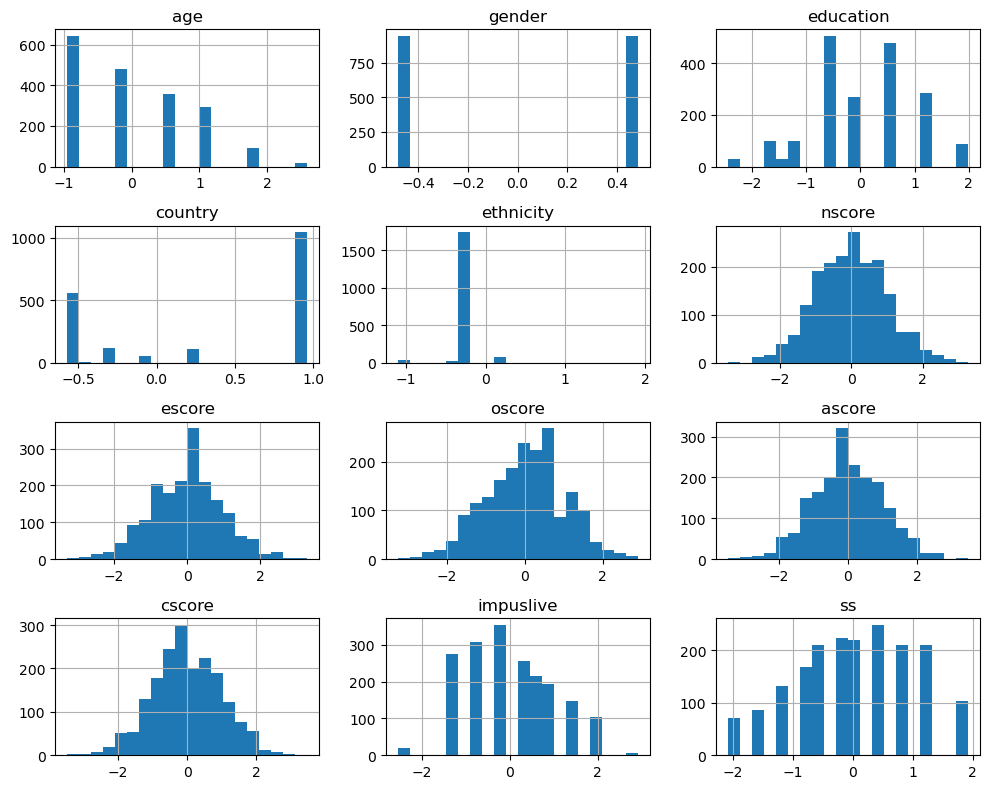

In [11]:
# Plot histogram for each feature
X.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/histogram_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Preprocessing

In [12]:
# Getting the name of the columns and their index
for index, column_name in enumerate(drug_data.columns):
    print(f"Index: {index}, Column Name: {column_name}")


Index: 0, Column Name: age
Index: 1, Column Name: gender
Index: 2, Column Name: education
Index: 3, Column Name: country
Index: 4, Column Name: ethnicity
Index: 5, Column Name: nscore
Index: 6, Column Name: escore
Index: 7, Column Name: oscore
Index: 8, Column Name: ascore
Index: 9, Column Name: cscore
Index: 10, Column Name: impuslive
Index: 11, Column Name: ss
Index: 12, Column Name: alcohol
Index: 13, Column Name: amphet
Index: 14, Column Name: amyl
Index: 15, Column Name: benzos
Index: 16, Column Name: caff
Index: 17, Column Name: cannabis
Index: 18, Column Name: choc
Index: 19, Column Name: coke
Index: 20, Column Name: crack
Index: 21, Column Name: ecstasy
Index: 22, Column Name: heroin
Index: 23, Column Name: ketamine
Index: 24, Column Name: legalh
Index: 25, Column Name: lsd
Index: 26, Column Name: meth
Index: 27, Column Name: mushrooms
Index: 28, Column Name: nicotine
Index: 29, Column Name: semer
Index: 30, Column Name: vsa


# Preprocessing for Alcohol

In [13]:
target_column = 12
X = drug_data.iloc[:, :12]  
y_alcohol = drug_data.iloc[:, target_column]

# Train-test split
from sklearn.model_selection import train_test_split
X_train_alcohol, X_test_alcohol, y_train_alcohol, y_test_alcohol = train_test_split(X, y_alcohol, test_size=0.2, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler_alcohol = StandardScaler()
X_train_alcohol = scaler_alcohol.fit_transform(X_train_alcohol)
X_test_alcohol = scaler_alcohol.transform(X_test_alcohol)


# Model Training for the target `Alcohol`

In [14]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_alcohol, y_train_alcohol)
rf_predictions = rf_model.predict(X_test_alcohol)

# SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_alcohol, y_train_alcohol)
svm_predictions = svm_model.predict(X_test_alcohol)

# Accuracy Scores
rf_accuracy = accuracy_score(y_test_alcohol, rf_predictions)
svm_accuracy = accuracy_score(y_test_alcohol, svm_predictions)

In [15]:
# Print Accuracy Scores
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"SVM Classifier Accuracy: {svm_accuracy:.4f}")

Random Forest Classifier Accuracy: 0.3660
SVM Classifier Accuracy: 0.4058


In [16]:
# Classification Report for both models
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_alcohol, rf_predictions, zero_division=0))


Random Forest Classification Report:
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00         7
         CL1       0.00      0.00      0.00         7
         CL2       0.00      0.00      0.00        16
         CL3       0.09      0.03      0.04        34
         CL4       0.29      0.06      0.10        68
         CL5       0.41      0.74      0.53       153
         CL6       0.26      0.22      0.24        92

    accuracy                           0.37       377
   macro avg       0.15      0.15      0.13       377
weighted avg       0.29      0.37      0.29       377



In [17]:
print("\nSVM Classification Report:")
print(classification_report(y_test_alcohol, svm_predictions, zero_division=0))


SVM Classification Report:
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00         7
         CL1       0.00      0.00      0.00         7
         CL2       0.00      0.00      0.00        16
         CL3       0.00      0.00      0.00        34
         CL4       0.00      0.00      0.00        68
         CL5       0.42      0.87      0.56       153
         CL6       0.35      0.22      0.27        92

    accuracy                           0.41       377
   macro avg       0.11      0.16      0.12       377
weighted avg       0.25      0.41      0.29       377



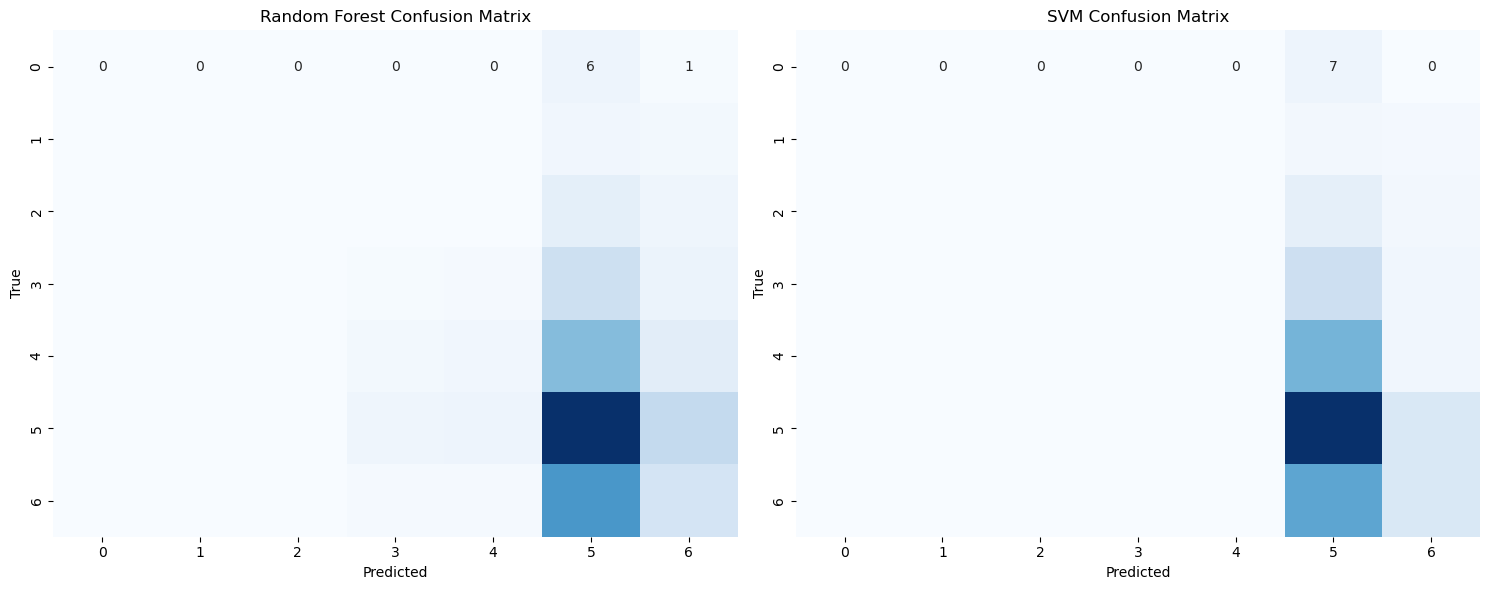

In [18]:
# Confusion Matrices for both models
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test_alcohol, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test_alcohol, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", ax=axes[1], cbar=False)
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/alcohol_matrice.png', dpi=300, bbox_inches='tight')
plt.show()



# Preprocessing for the target `Amphet`

In [19]:
target_column = 13
X = drug_data.iloc[:, :12]
y_amphet = drug_data.iloc[:, target_column]

# Train-test split
from sklearn.model_selection import train_test_split
X_train_amphet, X_test_amphet, y_train_amphet, y_test_amphet = train_test_split(X, y_amphet, test_size=0.2, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler_amphet = StandardScaler()
X_train_amphet = scaler_amphet.fit_transform(X_train_amphet)
X_test_amphet = scaler_amphet.transform(X_test_amphet)


# Model Training for the target `amphet`

In [149]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_amphet, y_train_amphet)
rf_predictions = rf_model.predict(X_test_amphet)

# SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_amphet, y_train_amphet)
svm_predictions = svm_model.predict(X_test_amphet)

# Accuracy Scores
rf_accuracy = accuracy_score(y_test_amphet, rf_predictions)
svm_accuracy = accuracy_score(y_test_amphet, svm_predictions)

In [150]:
# Print Accuracy Scores
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"SVM Classifier Accuracy: {svm_accuracy:.4f}")

Random Forest Classifier Accuracy: 0.5093
SVM Classifier Accuracy: 0.5119


In [151]:
# Classification Report for both models
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_amphet, rf_predictions, zero_division=0))


Random Forest Classification Report:
              precision    recall  f1-score   support

         CL0       0.58      0.90      0.70       196
         CL1       0.50      0.09      0.16        53
         CL2       0.13      0.04      0.07        46
         CL3       0.21      0.19      0.20        42
         CL4       0.00      0.00      0.00        13
         CL5       0.00      0.00      0.00        11
         CL6       0.00      0.00      0.00        16

    accuracy                           0.51       377
   macro avg       0.20      0.18      0.16       377
weighted avg       0.41      0.51      0.42       377



In [152]:
print("\nSVM Classification Report:")
print(classification_report(y_test_amphet, svm_predictions, zero_division=0))


SVM Classification Report:
              precision    recall  f1-score   support

         CL0       0.55      0.95      0.69       196
         CL1       0.50      0.02      0.04        53
         CL2       0.00      0.00      0.00        46
         CL3       0.18      0.14      0.16        42
         CL4       0.00      0.00      0.00        13
         CL5       0.00      0.00      0.00        11
         CL6       0.00      0.00      0.00        16

    accuracy                           0.51       377
   macro avg       0.18      0.16      0.13       377
weighted avg       0.37      0.51      0.38       377



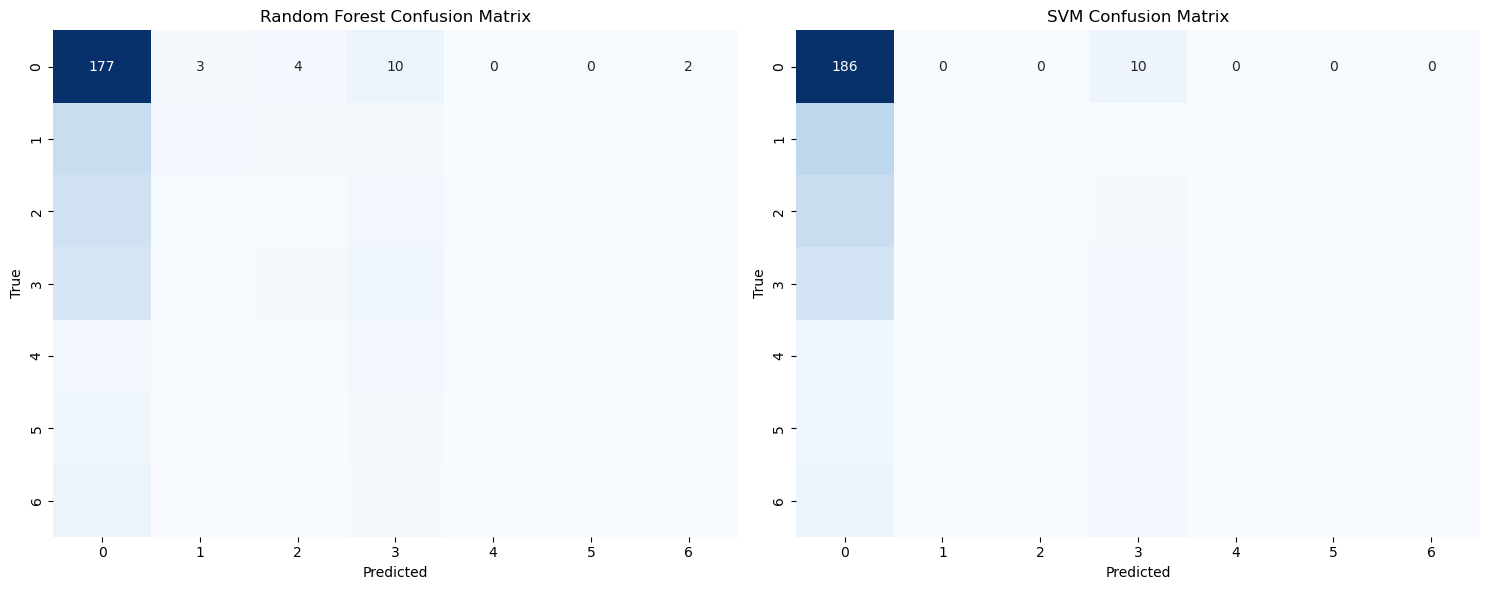

In [153]:
# Confusion Matrices for both models
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test_amphet, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test_amphet, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", ax=axes[1], cbar=False)
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/amphet_plot.png', dpi=300, bbox_inches='tight')
plt.show()



# Preprocessing for the target `amyl`

In [155]:
target_column = 14
X = drug_data.iloc[:, :12]
y_amyl = drug_data.iloc[:, target_column]

# Train-test split
from sklearn.model_selection import train_test_split
X_train_amyl, X_test_amyl, y_train_amyl, y_test_amyl = train_test_split(X, y_amyl, test_size=0.2, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler_amyl = StandardScaler()
X_train_amyl = scaler_amyl.fit_transform(X_train_amyl)
X_test_amyl = scaler_amyl.transform(X_test_amyl)


# Model Training for the target `amyl`

In [156]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_amyl, y_train_amyl)
rf_predictions = rf_model.predict(X_test_amyl)

# SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_amyl, y_train_amyl)
svm_predictions = svm_model.predict(X_test_amyl)

# Accuracy Scores
rf_accuracy = accuracy_score(y_test_amyl, rf_predictions)
svm_accuracy = accuracy_score(y_test_amyl, svm_predictions)

In [157]:
# Print Accuracy Scores
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"SVM Classifier Accuracy: {svm_accuracy:.4f}")

Random Forest Classifier Accuracy: 0.6976
SVM Classifier Accuracy: 0.6923


In [158]:
# Classification Report for both models
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_amyl, rf_predictions, zero_division=0))


Random Forest Classification Report:
              precision    recall  f1-score   support

         CL0       0.71      0.97      0.82       261
         CL1       0.60      0.13      0.22        45
         CL2       0.43      0.07      0.12        44
         CL3       0.00      0.00      0.00        20
         CL4       0.00      0.00      0.00         6
         CL5       0.00      0.00      0.00         1

    accuracy                           0.70       377
   macro avg       0.29      0.20      0.19       377
weighted avg       0.61      0.70      0.61       377



In [159]:
print("\nSVM Classification Report:")
print(classification_report(y_test_amyl, svm_predictions, zero_division=0))


SVM Classification Report:
              precision    recall  f1-score   support

         CL0       0.69      1.00      0.82       261
         CL1       1.00      0.02      0.04        45
         CL2       0.00      0.00      0.00        44
         CL3       0.00      0.00      0.00        20
         CL4       0.00      0.00      0.00         6
         CL5       0.00      0.00      0.00         1

    accuracy                           0.69       377
   macro avg       0.28      0.17      0.14       377
weighted avg       0.60      0.69      0.57       377



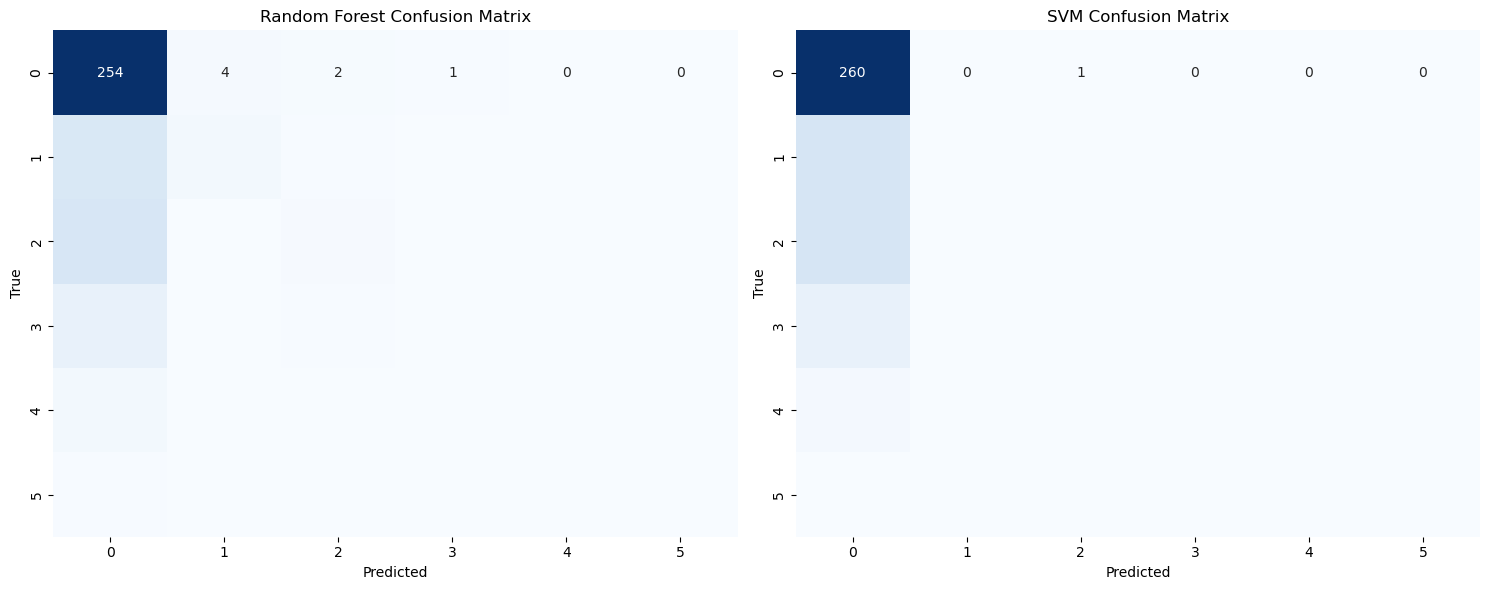

In [160]:
# Confusion Matrices for both models
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test_amyl, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges", ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test_amyl, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Oranges", ax=axes[1], cbar=False)
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/amyl_plot.png', dpi=300, bbox_inches='tight')
plt.show()



 # Preprocessing for Benzos

In [162]:
target_column = 15
X = drug_data.iloc[:, :12]
y_benzos = drug_data.iloc[:, target_column]


In [163]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train_benzos, X_test_benzos, y_train_benzos, y_test_benzos = train_test_split(X, y_benzos, test_size=0.2, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler_benzos = StandardScaler()
X_train_benzos = scaler_benzos.fit_transform(X_train_benzos)
X_test_benzos = scaler_benzos.transform(X_test_benzos)


In [164]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_benzos, y_train_benzos)
rf_predictions = rf_model.predict(X_test_benzos)

# SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_benzos, y_train_benzos)
svm_predictions = svm_model.predict(X_test_benzos)

# Accuracy Scores
rf_accuracy = accuracy_score(y_test_benzos, rf_predictions)
svm_accuracy = accuracy_score(y_test_benzos, svm_predictions)


In [165]:
# Print Accuracy Scores
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"SVM Classifier Accuracy: {svm_accuracy:.4f}")


Random Forest Classifier Accuracy: 0.5491
SVM Classifier Accuracy: 0.5491


In [166]:
# Classification Report for both models
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_benzos, rf_predictions, zero_division=0))



Random Forest Classification Report:
              precision    recall  f1-score   support

         CL0       0.60      0.95      0.74       203
         CL1       1.00      0.05      0.09        21
         CL2       0.11      0.03      0.04        38
         CL3       0.38      0.20      0.26        51
         CL4       0.09      0.04      0.05        27
         CL5       0.00      0.00      0.00        15
         CL6       0.29      0.09      0.14        22

    accuracy                           0.55       377
   macro avg       0.35      0.19      0.19       377
weighted avg       0.47      0.55      0.45       377



In [167]:
print("\nSVM Classification Report:")
print(classification_report(y_test_benzos, svm_predictions, zero_division=0))



SVM Classification Report:
              precision    recall  f1-score   support

         CL0       0.56      1.00      0.71       203
         CL1       0.00      0.00      0.00        21
         CL2       0.40      0.05      0.09        38
         CL3       0.50      0.06      0.11        51
         CL4       0.00      0.00      0.00        27
         CL5       0.00      0.00      0.00        15
         CL6       0.00      0.00      0.00        22

    accuracy                           0.55       377
   macro avg       0.21      0.16      0.13       377
weighted avg       0.41      0.55      0.41       377



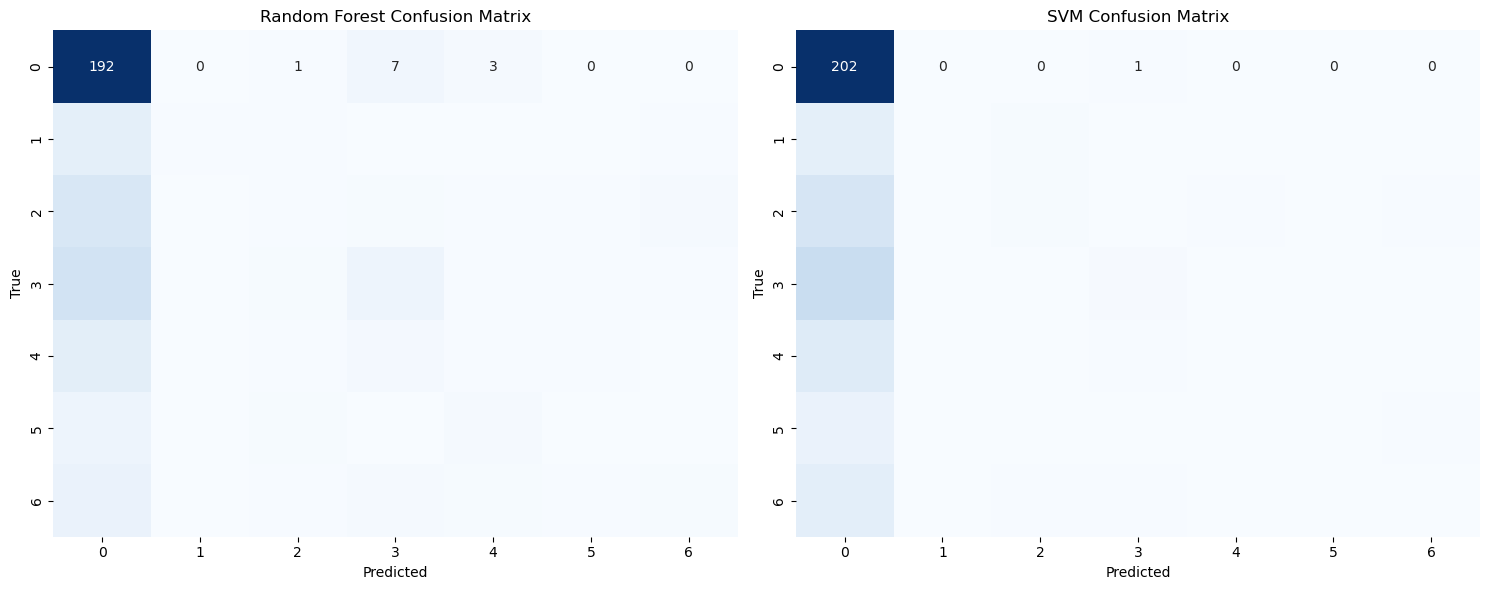

In [168]:
# Confusion Matrices for both models
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test_benzos, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Purples", ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test_benzos, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Purples", ax=axes[1], cbar=False)
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/benzos_plot.png', dpi=300, bbox_inches='tight')
plt.show()




# Preprocessing for Caff

In [169]:
target_column = 16
X = drug_data.iloc[:, :12]  
y_caff = drug_data.iloc[:, target_column]


# Train-test split
from sklearn.model_selection import train_test_split
X_train_caff, X_test_caff, y_train_caff, y_test_caff = train_test_split(X, y_caff, test_size=0.2, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler_caff = StandardScaler()
X_train_caff = scaler_caff.fit_transform(X_train_caff)
X_test_caff = scaler_caff.transform(X_test_caff)


# Modelling for the target "Caff"

In [170]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_caff, y_train_caff)
rf_predictions = rf_model.predict(X_test_caff)

# SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_caff, y_train_caff)
svm_predictions = svm_model.predict(X_test_caff)

# Accuracy Scores
rf_accuracy = accuracy_score(y_test_caff, rf_predictions)
svm_accuracy = accuracy_score(y_test_caff, svm_predictions)

In [171]:
# Print Accuracy Scores
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"SVM Classifier Accuracy: {svm_accuracy:.4f}")


Random Forest Classifier Accuracy: 0.7294
SVM Classifier Accuracy: 0.7321


In [172]:
# Classification Report for both models
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_caff, rf_predictions, zero_division=0))


Random Forest Classification Report:
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00         5
         CL1       0.00      0.00      0.00         3
         CL2       0.00      0.00      0.00         7
         CL3       0.00      0.00      0.00        13
         CL4       0.00      0.00      0.00        21
         CL5       0.00      0.00      0.00        52
         CL6       0.73      1.00      0.84       276

    accuracy                           0.73       377
   macro avg       0.10      0.14      0.12       377
weighted avg       0.54      0.73      0.62       377



In [173]:
print("\nSVM Classification Report:")
print(classification_report(y_test_caff, svm_predictions, zero_division=0))


SVM Classification Report:
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00         5
         CL1       0.00      0.00      0.00         3
         CL2       0.00      0.00      0.00         7
         CL3       0.00      0.00      0.00        13
         CL4       0.00      0.00      0.00        21
         CL5       0.00      0.00      0.00        52
         CL6       0.73      1.00      0.85       276

    accuracy                           0.73       377
   macro avg       0.10      0.14      0.12       377
weighted avg       0.54      0.73      0.62       377



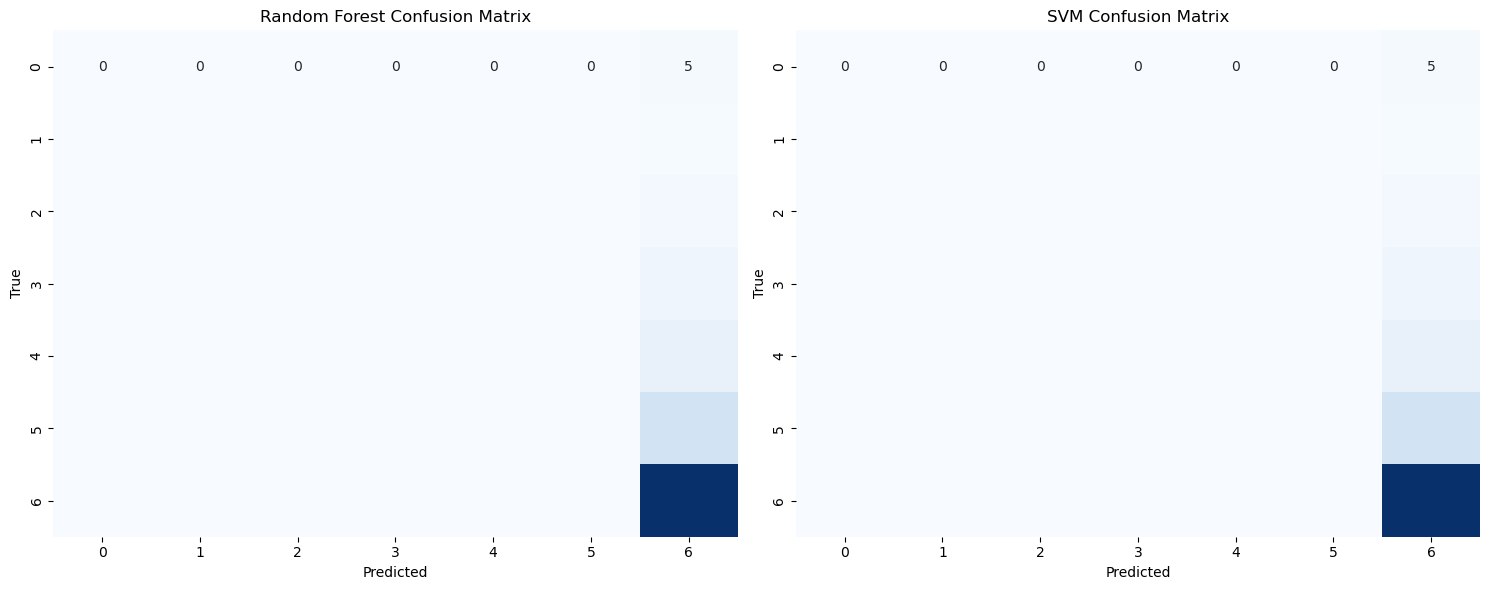

In [174]:
# Confusion Matrices for both models
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test_caff, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')


# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test_caff, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", ax=axes[1], cbar=False)
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/Caff_plot.png', dpi=300, bbox_inches='tight')
plt.show()


# Preprocessing for the target `cannabis`

In [175]:
target_column = 17
X = drug_data.iloc[:, :12]  
y_cannabis = drug_data.iloc[:, target_column]  

# Train-test split
from sklearn.model_selection import train_test_split
X_train_cannabis, X_test_cannabis, y_train_cannabis, y_test_cannabis = train_test_split(X, y_cannabis, test_size=0.2, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler_cannabis = StandardScaler()
X_train_cannabis = scaler_cannabis.fit_transform(X_train_cannabis)
X_test_cannabis = scaler_cannabis.transform(X_test_cannabis)


# Model for the target `Cannabis`

In [176]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_cannabis, y_train_cannabis)
rf_predictions = rf_model.predict(X_test_cannabis)

# SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_cannabis, y_train_cannabis)
svm_predictions = svm_model.predict(X_test_cannabis)

# Accuracy Scores
rf_accuracy = accuracy_score(y_test_cannabis, rf_predictions)
svm_accuracy = accuracy_score(y_test_cannabis, svm_predictions)

In [177]:
# Print Accuracy Scores
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"SVM Classifier Accuracy: {svm_accuracy:.4f}")


Random Forest Classifier Accuracy: 0.4138
SVM Classifier Accuracy: 0.4218


In [178]:
# Classification Report for both models
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_cannabis, rf_predictions, zero_division=0))



Random Forest Classification Report:
              precision    recall  f1-score   support

         CL0       0.54      0.71      0.61        86
         CL1       0.33      0.39      0.36        28
         CL2       0.17      0.11      0.13        55
         CL3       0.33      0.09      0.14        57
         CL4       0.00      0.00      0.00        27
         CL5       0.10      0.03      0.05        32
         CL6       0.43      0.78      0.55        92

    accuracy                           0.41       377
   macro avg       0.27      0.30      0.26       377
weighted avg       0.34      0.41      0.35       377



In [179]:
print("\nSVM Classification Report:")
print(classification_report(y_test_cannabis, svm_predictions, zero_division =0))



SVM Classification Report:
              precision    recall  f1-score   support

         CL0       0.52      0.73      0.61        86
         CL1       0.31      0.32      0.32        28
         CL2       0.16      0.11      0.13        55
         CL3       0.00      0.00      0.00        57
         CL4       0.00      0.00      0.00        27
         CL5       0.00      0.00      0.00        32
         CL6       0.43      0.88      0.58        92

    accuracy                           0.42       377
   macro avg       0.20      0.29      0.23       377
weighted avg       0.27      0.42      0.32       377



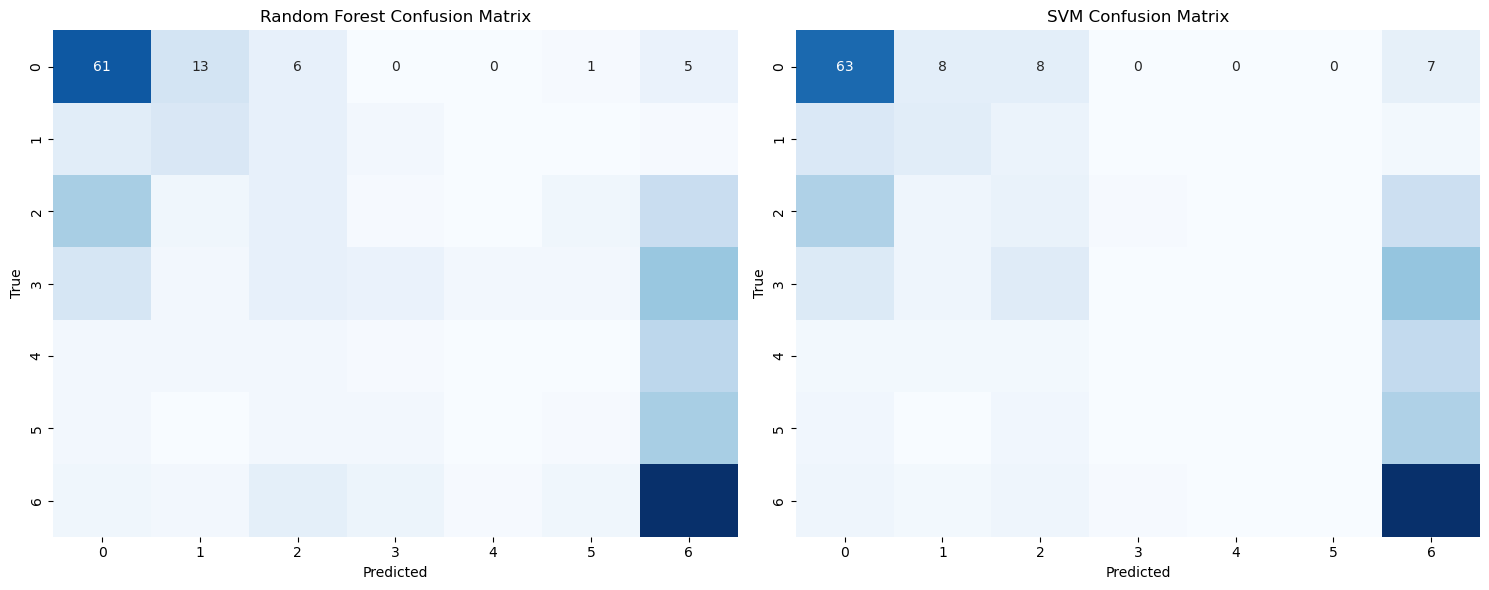

In [180]:
# Confusion Matrices for both models
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test_cannabis, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test_cannabis, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", ax=axes[1], cbar=False)
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/cannabis_plot.png', dpi=300, bbox_inches='tight')
plt.show()


# CHOC

### Preprocessing for the target `choc`

In [181]:
target_column = 18
X = drug_data.iloc[:, :12]
y_choc = drug_data.iloc[:, target_column]

# Train-test split
X_train_choc, X_test_choc, y_train_choc, y_test_choc = train_test_split(X, y_choc, test_size=0.2, random_state=42)

# Feature scaling
scaler_choc = StandardScaler()
X_train_choc = scaler_choc.fit_transform(X_train_choc)
X_test_choc = scaler_choc.transform(X_test_choc)

# Model for the target `choc`

In [182]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_choc, y_train_choc)
rf_predictions = rf_model.predict(X_test_choc)

# SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_choc, y_train_choc)
svm_predictions = svm_model.predict(X_test_choc)

# Accuracy Scores
rf_accuracy = accuracy_score(y_test_choc, rf_predictions)
svm_accuracy = accuracy_score(y_test_choc, svm_predictions)

In [183]:
# Print Accuracy Scores
print(f"choc - Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"choc - SVM Classifier Accuracy: {svm_accuracy:.4f}")



choc - Random Forest Classifier Accuracy: 0.4164
choc - SVM Classifier Accuracy: 0.4085


In [184]:
# Classification Reports
print(classification_report(y_test_choc, rf_predictions, zero_division=0))


              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00         4
         CL2       0.00      0.00      0.00         3
         CL3       0.00      0.00      0.00         9
         CL4       0.24      0.08      0.12        52
         CL5       0.43      0.34      0.38       156
         CL6       0.42      0.65      0.51       153

    accuracy                           0.42       377
   macro avg       0.18      0.18      0.17       377
weighted avg       0.38      0.42      0.38       377



In [185]:
print(classification_report(y_test_choc, svm_predictions, zero_division=0))


              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00         4
         CL2       0.00      0.00      0.00         3
         CL3       0.00      0.00      0.00         9
         CL4       0.00      0.00      0.00        52
         CL5       0.37      0.24      0.29       156
         CL6       0.42      0.76      0.55       153

    accuracy                           0.41       377
   macro avg       0.13      0.17      0.14       377
weighted avg       0.32      0.41      0.34       377



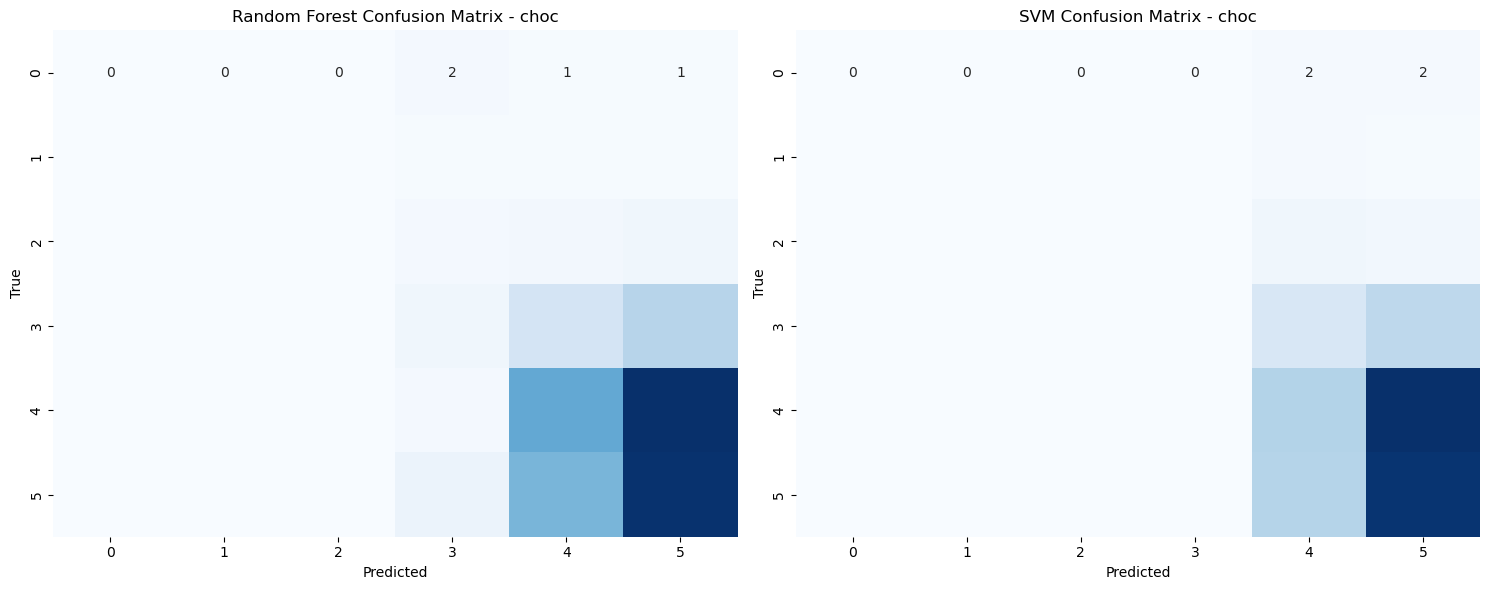

In [186]:
# Confusion Matrices Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test_choc, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix - choc")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test_choc, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", ax=axes[1], cbar=False)
axes[1].set_title("SVM Confusion Matrix - choc")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/choc_plot.png', dpi=300, bbox_inches='tight')

plt.show()

# COKE

# Preprocessing for the target `COKE`

In [187]:
target_column = 19
X = drug_data.iloc[:, :12]
y_coke = drug_data.iloc[:, target_column]

X_train_coke, X_test_coke, y_train_coke, y_test_coke = train_test_split(X, y_coke, test_size=0.2, random_state=42)

scaler_coke = StandardScaler()
X_train_coke = scaler_coke.fit_transform(X_train_coke)
X_test_coke = scaler_coke.transform(X_test_coke)


# Model for the target `COKE`

In [188]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_coke, y_train_coke)
rf_predictions = rf_model.predict(X_test_coke)

svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_coke, y_train_coke)
svm_predictions = svm_model.predict(X_test_coke)


In [189]:
rf_accuracy = accuracy_score(y_test_coke, rf_predictions)
svm_accuracy = accuracy_score(y_test_coke, svm_predictions)


In [190]:
print(f"coke - Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"coke - SVM Classifier Accuracy: {svm_accuracy:.4f}")


coke - Random Forest Classifier Accuracy: 0.5809
coke - SVM Classifier Accuracy: 0.6021


In [191]:
print("\nRandom Forest Classification Report for coke:")
print(classification_report(y_test_coke, rf_predictions, zero_division=0))


Random Forest Classification Report for coke:
              precision    recall  f1-score   support

         CL0       0.66      0.93      0.77       224
         CL1       0.50      0.13      0.21        30
         CL2       0.11      0.05      0.06        44
         CL3       0.16      0.12      0.14        43
         CL4       0.00      0.00      0.00        25
         CL5       0.00      0.00      0.00         8
         CL6       0.00      0.00      0.00         3

    accuracy                           0.58       377
   macro avg       0.20      0.17      0.17       377
weighted avg       0.46      0.58      0.50       377



In [192]:
print("\nSVM Classification Report for coke:")
print(classification_report(y_test_coke, svm_predictions, zero_division=0))



SVM Classification Report for coke:
              precision    recall  f1-score   support

         CL0       0.64      0.98      0.78       224
         CL1       0.62      0.17      0.26        30
         CL2       0.08      0.02      0.04        44
         CL3       0.07      0.02      0.04        43
         CL4       0.00      0.00      0.00        25
         CL5       0.00      0.00      0.00         8
         CL6       0.00      0.00      0.00         3

    accuracy                           0.60       377
   macro avg       0.20      0.17      0.16       377
weighted avg       0.45      0.60      0.49       377



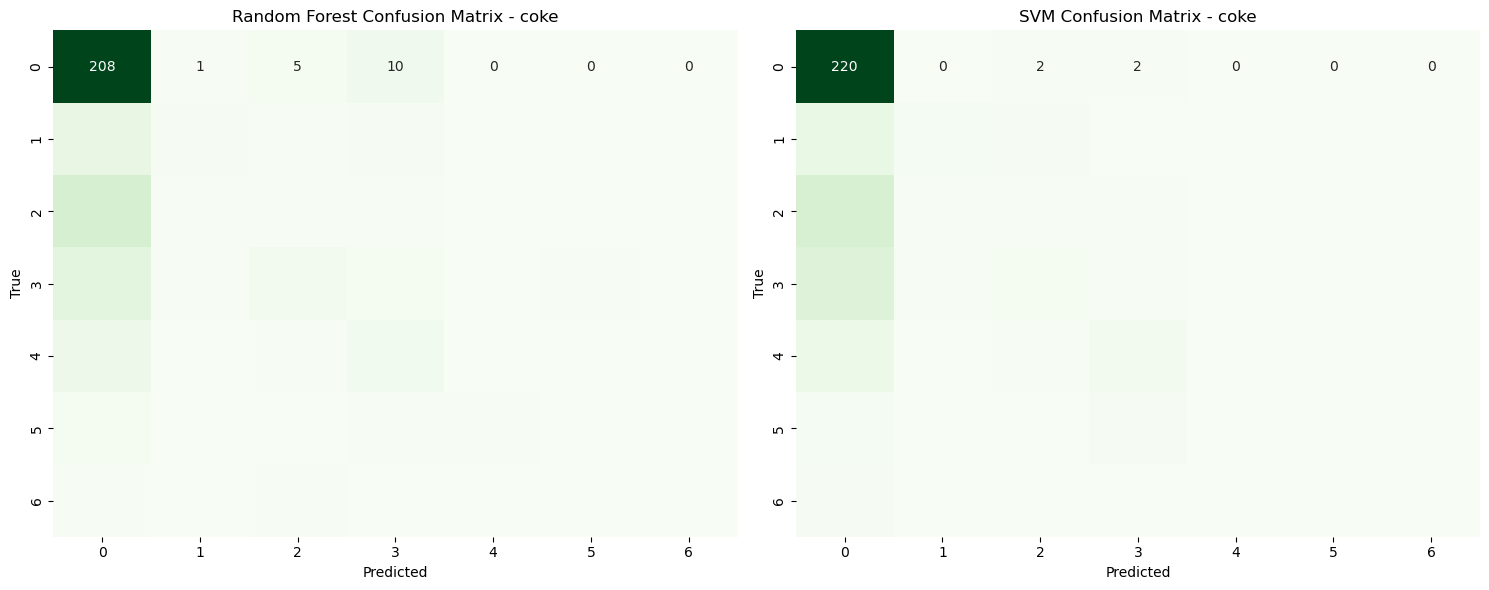

In [193]:
# Visualization of the confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

cm_rf = confusion_matrix(y_test_coke, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix - coke")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')


cm_svm = confusion_matrix(y_test_coke, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens", ax=axes[1], cbar=False)
axes[1].set_title("SVM Confusion Matrix - coke")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/coke_plot.png', dpi=300, bbox_inches='tight')

plt.show()


# CRACK

# Preprocessing for the target `CRACK`

In [194]:
target_column = 20
X = drug_data.iloc[:, :12]
y_crack = drug_data.iloc[:, target_column]

X_train_crack, X_test_crack, y_train_crack, y_test_crack = train_test_split(X, y_crack, test_size=0.2, random_state=42)

scaler_crack = StandardScaler()
X_train_crack = scaler_crack.fit_transform(X_train_crack)
X_test_crack = scaler_crack.transform(X_test_crack)

# Model for the target `CRACK`

In [195]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_crack, y_train_crack)
rf_predictions = rf_model.predict(X_test_crack)

svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_crack, y_train_crack)
svm_predictions = svm_model.predict(X_test_crack)

rf_accuracy = accuracy_score(y_test_crack, rf_predictions)
svm_accuracy = accuracy_score(y_test_crack, svm_predictions)


In [196]:
print(f"crack - Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"crack - SVM Classifier Accuracy: {svm_accuracy:.4f}")


crack - Random Forest Classifier Accuracy: 0.8886
crack - SVM Classifier Accuracy: 0.8859


In [197]:
# Forest Classification Report for crack
print(classification_report(y_test_crack, rf_predictions, zero_division=0))

              precision    recall  f1-score   support

         CL0       0.89      1.00      0.94       334
         CL1       0.00      0.00      0.00         8
         CL2       1.00      0.05      0.09        22
         CL3       0.00      0.00      0.00         9
         CL4       0.00      0.00      0.00         2
         CL5       0.00      0.00      0.00         1
         CL6       0.00      0.00      0.00         1

    accuracy                           0.89       377
   macro avg       0.27      0.15      0.15       377
weighted avg       0.85      0.89      0.84       377



In [198]:
# SVM Classification Report for crack
print(classification_report(y_test_crack, svm_predictions, zero_division=0))


              precision    recall  f1-score   support

         CL0       0.89      1.00      0.94       334
         CL1       0.00      0.00      0.00         8
         CL2       0.00      0.00      0.00        22
         CL3       0.00      0.00      0.00         9
         CL4       0.00      0.00      0.00         2
         CL5       0.00      0.00      0.00         1
         CL6       0.00      0.00      0.00         1

    accuracy                           0.89       377
   macro avg       0.13      0.14      0.13       377
weighted avg       0.78      0.89      0.83       377



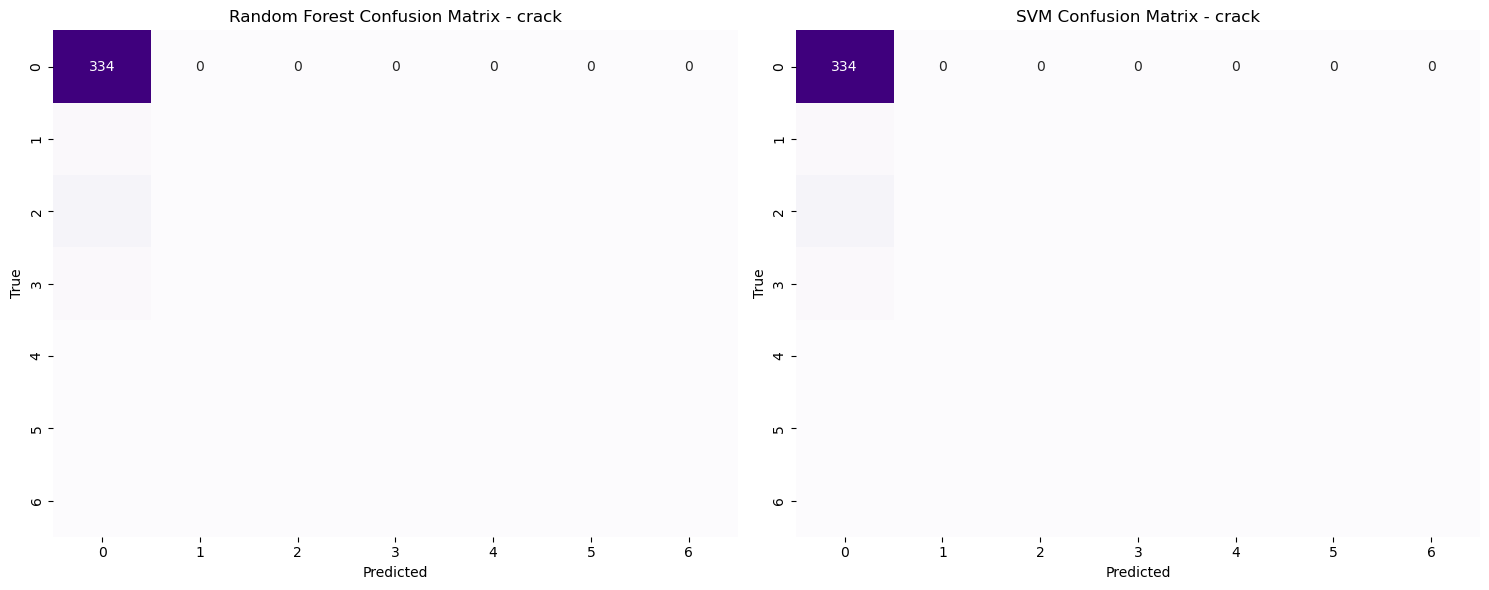

In [199]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

cm_rf = confusion_matrix(y_test_crack, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Purples", ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix - crack")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

cm_svm = confusion_matrix(y_test_crack, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Purples", ax=axes[1], cbar=False)
axes[1].set_title("SVM Confusion Matrix - crack")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/crack_plot.png', dpi=300, bbox_inches='tight')

plt.show()

# Preprocessing for the target `ecstasy`

In [200]:
target_column = 21
X = drug_data.iloc[:, :12]
y_ecstasy = drug_data.iloc[:, target_column]

X_train_ecstasy, X_test_ecstasy, y_train_ecstasy, y_test_ecstasy = train_test_split(X, y_ecstasy, test_size=0.2, random_state=42)

scaler_ecstasy = StandardScaler()
X_train_ecstasy = scaler_ecstasy.fit_transform(X_train_ecstasy)
X_test_ecstasy = scaler_ecstasy.transform(X_test_ecstasy)


# Model for the target `ecstasy`

In [201]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_ecstasy, y_train_ecstasy)
rf_predictions = rf_model.predict(X_test_ecstasy)

svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_ecstasy, y_train_ecstasy)
svm_predictions = svm_model.predict(X_test_ecstasy)

rf_accuracy = accuracy_score(y_test_ecstasy, rf_predictions)
svm_accuracy = accuracy_score(y_test_ecstasy, svm_predictions)


In [202]:
print(f"ecstasy - Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"ecstasy - SVM Classifier Accuracy: {svm_accuracy:.4f}")

ecstasy - Random Forest Classifier Accuracy: 0.5491
ecstasy - SVM Classifier Accuracy: 0.5650


In [203]:
# Random Forest Classification Report for ecstasy
print(classification_report(y_test_ecstasy, rf_predictions, zero_division=0))

              precision    recall  f1-score   support

         CL0       0.63      0.88      0.74       208
         CL1       0.33      0.05      0.08        22
         CL2       0.16      0.07      0.10        43
         CL3       0.37      0.31      0.33        62
         CL4       0.00      0.00      0.00        30
         CL5       0.00      0.00      0.00         9
         CL6       0.00      0.00      0.00         3

    accuracy                           0.55       377
   macro avg       0.21      0.19      0.18       377
weighted avg       0.45      0.55      0.48       377



In [204]:
# SVM Classification Report for ecstasy
print(classification_report(y_test_ecstasy, svm_predictions, zero_division=0))


              precision    recall  f1-score   support

         CL0       0.59      0.92      0.72       208
         CL1       0.00      0.00      0.00        22
         CL2       0.00      0.00      0.00        43
         CL3       0.40      0.35      0.38        62
         CL4       0.00      0.00      0.00        30
         CL5       0.00      0.00      0.00         9
         CL6       0.00      0.00      0.00         3

    accuracy                           0.56       377
   macro avg       0.14      0.18      0.16       377
weighted avg       0.39      0.56      0.46       377



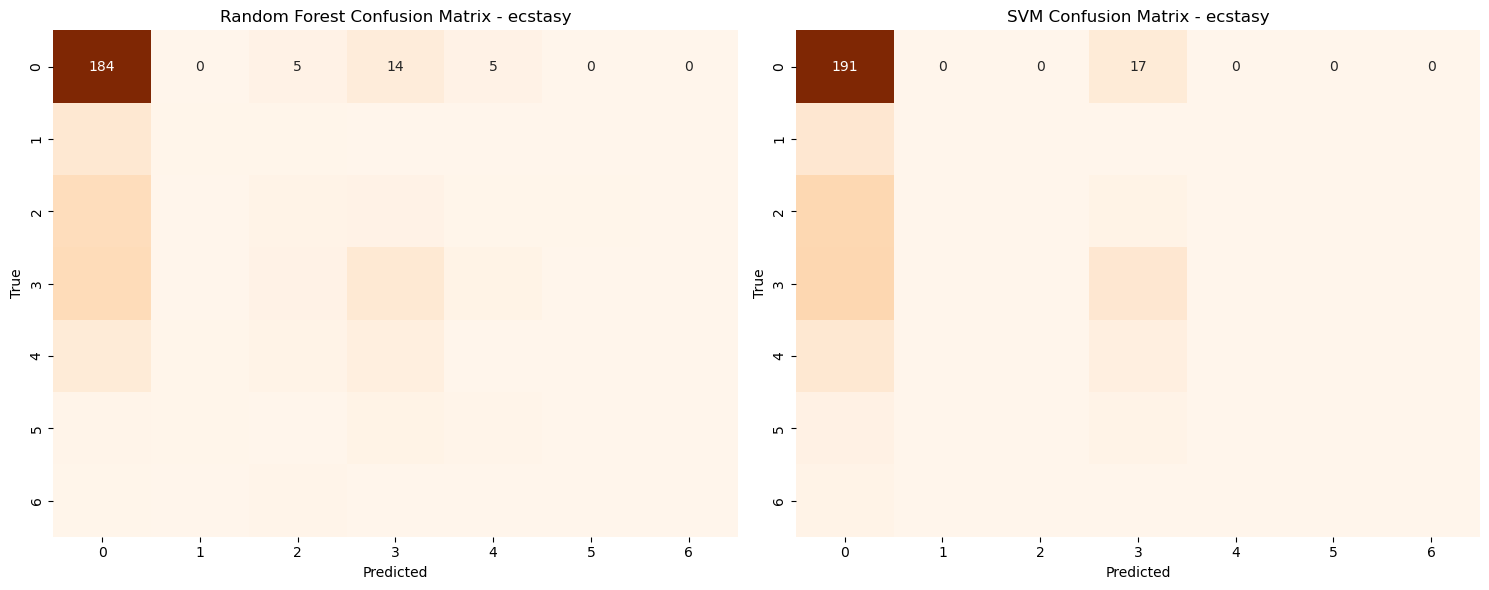

In [205]:
# Visualization of the confusion matrix

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

cm_rf = confusion_matrix(y_test_ecstasy, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges", ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix - ecstasy")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

cm_svm = confusion_matrix(y_test_ecstasy, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Oranges", ax=axes[1], cbar=False)
axes[1].set_title("SVM Confusion Matrix - ecstasy")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/ecstasy_plot.png', dpi=300, bbox_inches='tight')

plt.show()


# Preprocessing for the target `heroin`

In [206]:
target_column = 22
X = drug_data.iloc[:, :12]
y_heroin = drug_data.iloc[:, target_column]

X_train_heroin, X_test_heroin, y_train_heroin, y_test_heroin = train_test_split(X, y_heroin, test_size=0.2, random_state=42)

scaler_heroin = StandardScaler()
X_train_heroin = scaler_heroin.fit_transform(X_train_heroin)
X_test_heroin = scaler_heroin.transform(X_test_heroin)


# Model for the target `heroin`

In [207]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_heroin, y_train_heroin)
rf_predictions = rf_model.predict(X_test_heroin)

svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_heroin, y_train_heroin)
svm_predictions = svm_model.predict(X_test_heroin)

rf_accuracy = accuracy_score(y_test_heroin, rf_predictions)
svm_accuracy = accuracy_score(y_test_heroin, svm_predictions)


In [208]:
print(f"heroin - Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"heroin - SVM Classifier Accuracy: {svm_accuracy:.4f}")

heroin - Random Forest Classifier Accuracy: 0.8594
heroin - SVM Classifier Accuracy: 0.8594


In [209]:
# Random Forest Classification Report for heroin
print(classification_report(y_test_heroin, rf_predictions, zero_division=0))

              precision    recall  f1-score   support

         CL0       0.86      1.00      0.92       324
         CL1       0.00      0.00      0.00        11
         CL2       0.00      0.00      0.00        18
         CL3       0.50      0.08      0.14        12
         CL4       0.00      0.00      0.00         6
         CL5       0.00      0.00      0.00         4
         CL6       0.00      0.00      0.00         2

    accuracy                           0.86       377
   macro avg       0.19      0.15      0.15       377
weighted avg       0.76      0.86      0.80       377



In [210]:
# SVM Classification Report for heroin
print(classification_report(y_test_heroin, svm_predictions, zero_division=0))

              precision    recall  f1-score   support

         CL0       0.86      1.00      0.92       324
         CL1       0.00      0.00      0.00        11
         CL2       0.00      0.00      0.00        18
         CL3       0.00      0.00      0.00        12
         CL4       0.00      0.00      0.00         6
         CL5       0.00      0.00      0.00         4
         CL6       0.00      0.00      0.00         2

    accuracy                           0.86       377
   macro avg       0.12      0.14      0.13       377
weighted avg       0.74      0.86      0.79       377



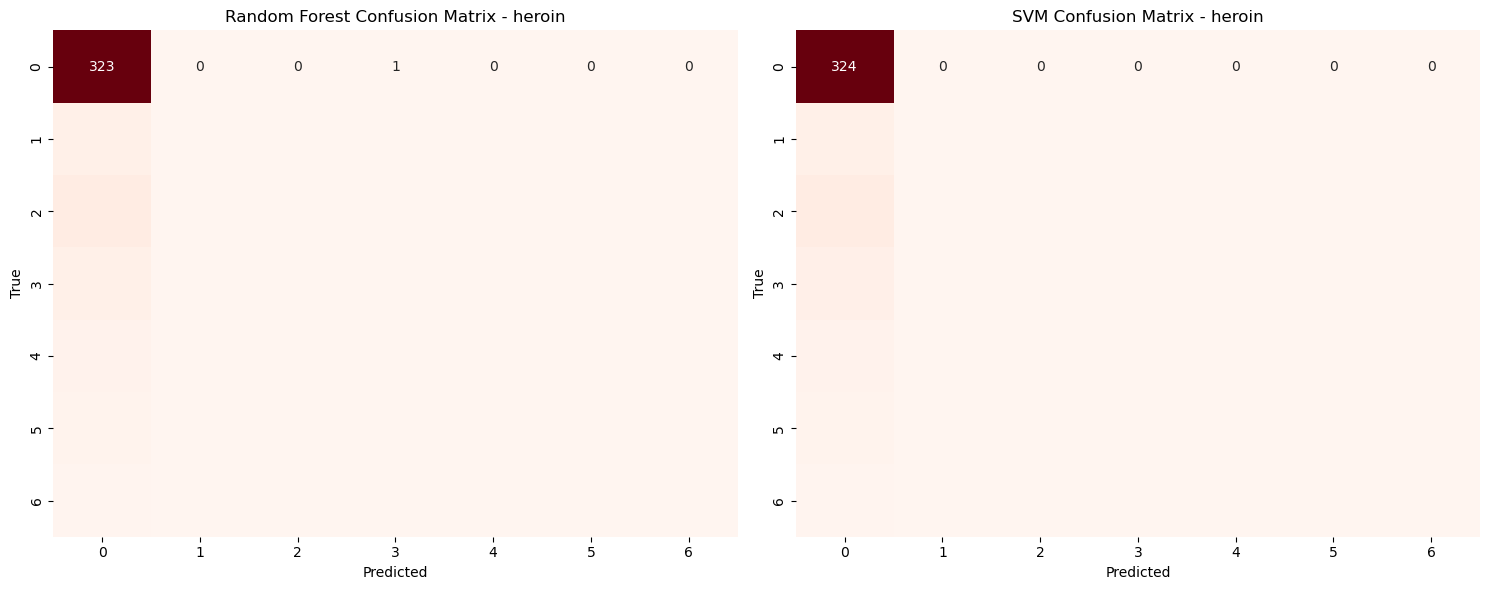

In [211]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

cm_rf = confusion_matrix(y_test_heroin, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Reds", ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix - heroin")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

cm_svm = confusion_matrix(y_test_heroin, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Reds", ax=axes[1], cbar=False)
axes[1].set_title("SVM Confusion Matrix - heroin")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/heroin_plot.png', dpi=300, bbox_inches='tight')

plt.show()


# Preprocessing for the target `ketamine`

In [212]:
target_column = 23
X = drug_data.iloc[:, :12]
y_ketamine = drug_data.iloc[:, target_column]

X_train_ketamine, X_test_ketamine, y_train_ketamine, y_test_ketamine = train_test_split(X, y_ketamine, test_size=0.2, random_state=42)

scaler_ketamine = StandardScaler()
X_train_ketamine = scaler_ketamine.fit_transform(X_train_ketamine)
X_test_ketamine = scaler_ketamine.transform(X_test_ketamine)


# Model for the target `ketamine`

In [213]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_ketamine, y_train_ketamine)
rf_predictions = rf_model.predict(X_test_ketamine)

svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_ketamine, y_train_ketamine)
svm_predictions = svm_model.predict(X_test_ketamine)

rf_accuracy = accuracy_score(y_test_ketamine, rf_predictions)
svm_accuracy = accuracy_score(y_test_ketamine, svm_predictions)


In [214]:
print(f"ketamine - Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"ketamine - SVM Classifier Accuracy: {svm_accuracy:.4f}")

ketamine - Random Forest Classifier Accuracy: 0.8170
ketamine - SVM Classifier Accuracy: 0.8170


In [215]:
# Random Forest Classification Report for ketamine:")
print(classification_report(y_test_ketamine, rf_predictions, zero_division=0))

              precision    recall  f1-score   support

         CL0       0.82      1.00      0.90       308
         CL1       0.00      0.00      0.00         4
         CL2       0.00      0.00      0.00        22
         CL3       0.00      0.00      0.00        23
         CL4       0.00      0.00      0.00         8
         CL5       0.00      0.00      0.00        11
         CL6       0.00      0.00      0.00         1

    accuracy                           0.82       377
   macro avg       0.12      0.14      0.13       377
weighted avg       0.67      0.82      0.74       377



In [216]:
# SVM Classification Report for ketamine
print(classification_report(y_test_ketamine, svm_predictions, zero_division=0))

              precision    recall  f1-score   support

         CL0       0.82      1.00      0.90       308
         CL1       0.00      0.00      0.00         4
         CL2       0.00      0.00      0.00        22
         CL3       0.00      0.00      0.00        23
         CL4       0.00      0.00      0.00         8
         CL5       0.00      0.00      0.00        11
         CL6       0.00      0.00      0.00         1

    accuracy                           0.82       377
   macro avg       0.12      0.14      0.13       377
weighted avg       0.67      0.82      0.73       377



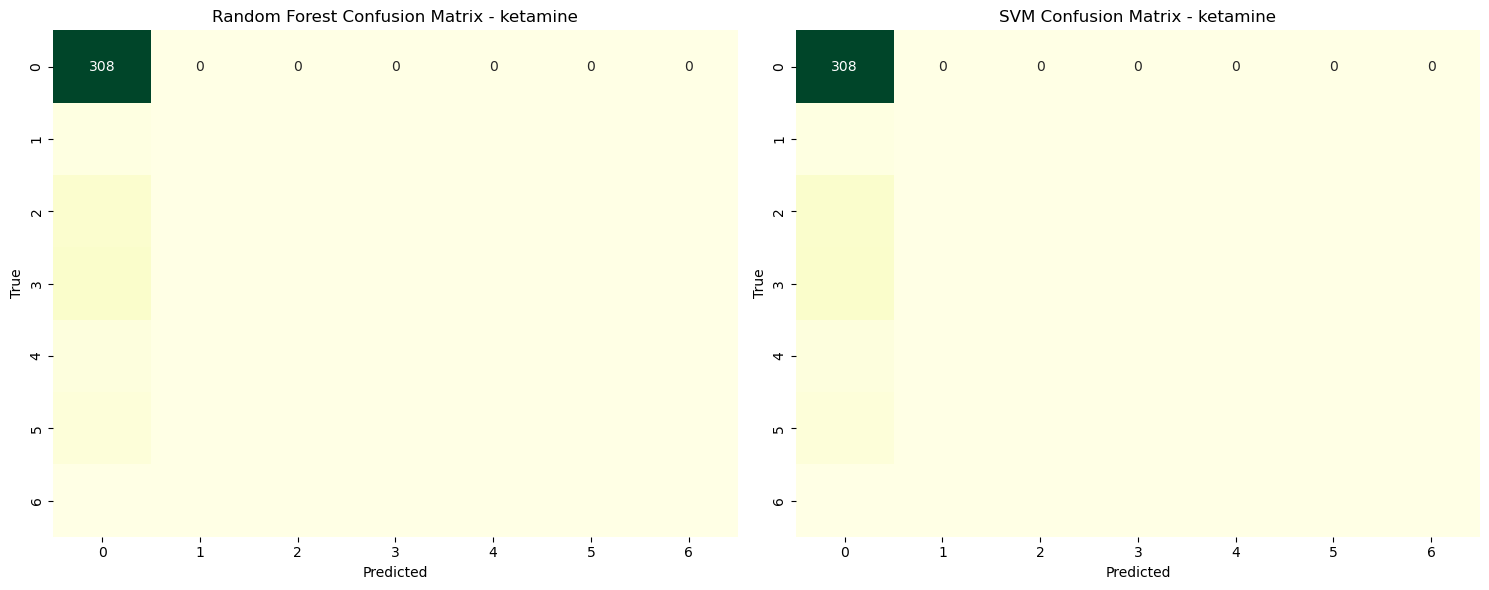

In [217]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

cm_rf = confusion_matrix(y_test_ketamine, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="YlGn", ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix - ketamine")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

cm_svm = confusion_matrix(y_test_ketamine, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="YlGn", ax=axes[1], cbar=False)
axes[1].set_title("SVM Confusion Matrix - ketamine")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/ketamine_plot.png', dpi=300, bbox_inches='tight')

plt.show()


# Preprocessing for the target `legalh`

In [218]:
target_column = 24
X = drug_data.iloc[:, :12]
y_legalh = drug_data.iloc[:, target_column]

X_train_legalh, X_test_legalh, y_train_legalh, y_test_legalh = train_test_split(X, y_legalh, test_size=0.2, random_state=42)

scaler_legalh = StandardScaler()
X_train_legalh = scaler_legalh.fit_transform(X_train_legalh)
X_test_legalh = scaler_legalh.transform(X_test_legalh)

# Model for the target `legalh`

In [219]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_legalh, y_train_legalh)
rf_predictions = rf_model.predict(X_test_legalh)

svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_legalh, y_train_legalh)
svm_predictions = svm_model.predict(X_test_legalh)

rf_accuracy = accuracy_score(y_test_legalh, rf_predictions)
svm_accuracy = accuracy_score(y_test_legalh, svm_predictions)

In [222]:
print(f"legalh - Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"legalh - SVM Classifier Accuracy: {svm_accuracy:.4f}")

legalh - Random Forest Classifier Accuracy: 0.6048
legalh - SVM Classifier Accuracy: 0.6127


In [223]:
print("\nRandom Forest Classification Report for legalh:")
print(classification_report(y_test_legalh, rf_predictions, zero_division=0))


Random Forest Classification Report for legalh:
              precision    recall  f1-score   support

         CL0       0.72      0.93      0.81       216
         CL1       0.00      0.00      0.00         3
         CL2       0.09      0.02      0.04        42
         CL3       0.32      0.37      0.35        65
         CL4       0.33      0.08      0.13        25
         CL5       0.00      0.00      0.00        15
         CL6       0.00      0.00      0.00        11

    accuracy                           0.60       377
   macro avg       0.21      0.20      0.19       377
weighted avg       0.50      0.60      0.54       377



In [224]:
print("\nSVM Classification Report for legalh:")
print(classification_report(y_test_legalh, svm_predictions, zero_division=0))



SVM Classification Report for legalh:
              precision    recall  f1-score   support

         CL0       0.70      0.93      0.80       216
         CL1       0.00      0.00      0.00         3
         CL2       0.00      0.00      0.00        42
         CL3       0.33      0.48      0.39        65
         CL4       0.00      0.00      0.00        25
         CL5       0.00      0.00      0.00        15
         CL6       0.00      0.00      0.00        11

    accuracy                           0.61       377
   macro avg       0.15      0.20      0.17       377
weighted avg       0.46      0.61      0.53       377



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


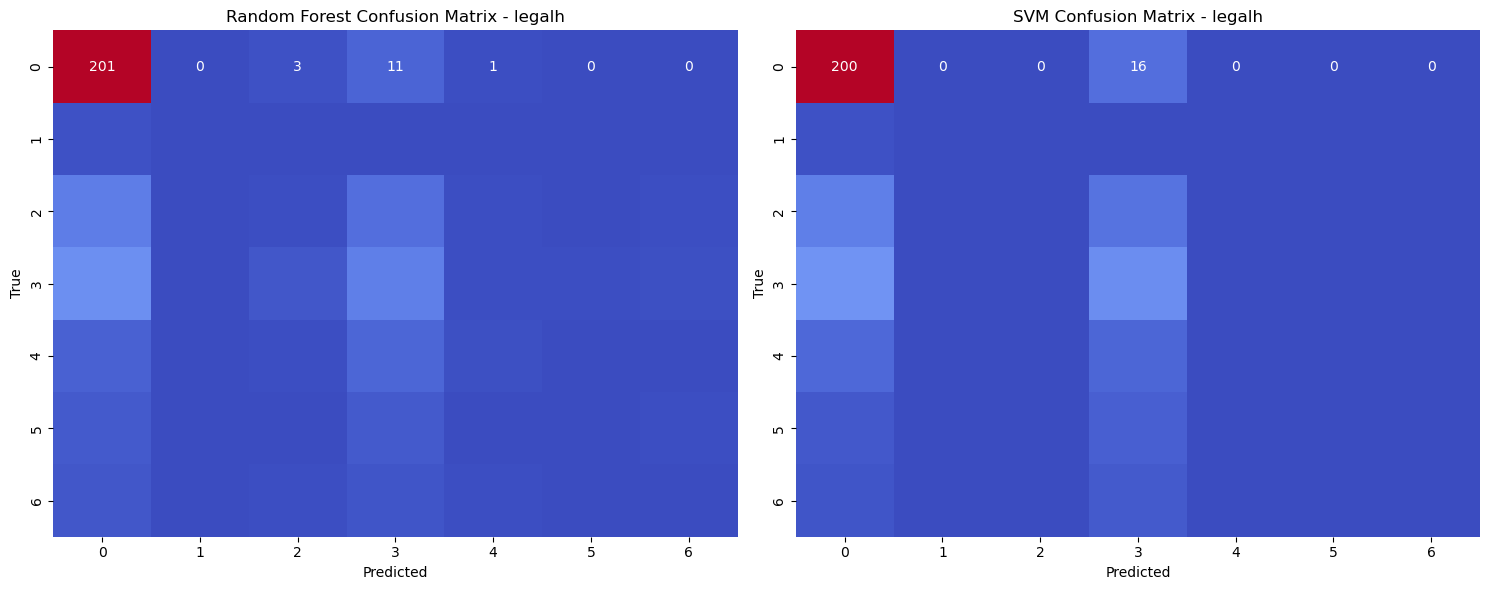

In [225]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

cm_rf = confusion_matrix(y_test_legalh, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="coolwarm", ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix - legalh")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

cm_svm = confusion_matrix(y_test_legalh, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="coolwarm", ax=axes[1], cbar=False)
axes[1].set_title("SVM Confusion Matrix - legalh")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/legalh_plot.png', dpi=300, bbox_inches='tight')

plt.show()


# Preprocessing for the target `lsd`

In [226]:
target_column = 25
X = drug_data.iloc[:, :12]
y_lsd = drug_data.iloc[:, target_column]

X_train_lsd, X_test_lsd, y_train_lsd, y_test_lsd = train_test_split(X, y_lsd, test_size=0.2, random_state=42)

scaler_lsd = StandardScaler()
X_train_lsd = scaler_lsd.fit_transform(X_train_lsd)
X_test_lsd = scaler_lsd.transform(X_test_lsd)

# Model for the target `lsd`

In [227]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_lsd, y_train_lsd)
rf_predictions = rf_model.predict(X_test_lsd)

svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_lsd, y_train_lsd)
svm_predictions = svm_model.predict(X_test_lsd)

rf_accuracy = accuracy_score(y_test_lsd, rf_predictions)
svm_accuracy = accuracy_score(y_test_lsd, svm_predictions)


In [228]:
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"SVM Classifier Accuracy: {svm_accuracy:.4f}")

Random Forest Classifier Accuracy: 0.6021
SVM Classifier Accuracy: 0.6101


In [229]:
# Forest Classification Report for lsd
print(classification_report(y_test_lsd, rf_predictions, zero_division=0))


              precision    recall  f1-score   support

         CL0       0.67      0.89      0.76       218
         CL1       0.65      0.25      0.36        52
         CL2       0.29      0.14      0.19        28
         CL3       0.31      0.35      0.33        46
         CL4       0.00      0.00      0.00        20
         CL5       0.00      0.00      0.00        11
         CL6       0.00      0.00      0.00         2

    accuracy                           0.60       377
   macro avg       0.27      0.23      0.23       377
weighted avg       0.53      0.60      0.54       377



In [230]:
# SVM Classification Report for lsd
print(classification_report(y_test_lsd, svm_predictions, zero_division=0))

              precision    recall  f1-score   support

         CL0       0.66      0.90      0.76       218
         CL1       0.79      0.21      0.33        52
         CL2       0.25      0.07      0.11        28
         CL3       0.36      0.46      0.40        46
         CL4       0.00      0.00      0.00        20
         CL5       0.00      0.00      0.00        11
         CL6       0.00      0.00      0.00         2

    accuracy                           0.61       377
   macro avg       0.29      0.23      0.23       377
weighted avg       0.55      0.61      0.54       377



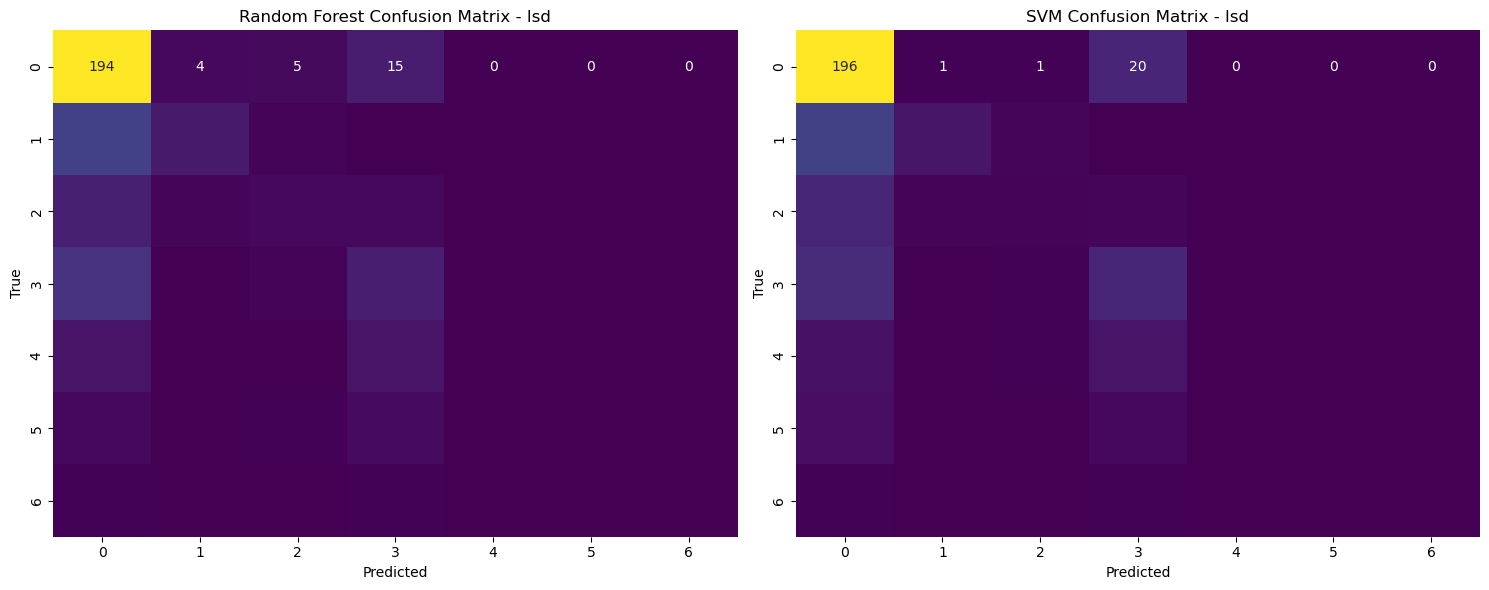

In [231]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

cm_rf = confusion_matrix(y_test_lsd, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="viridis", ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix - lsd")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

cm_svm = confusion_matrix(y_test_lsd, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="viridis", ax=axes[1], cbar=False)
axes[1].set_title("SVM Confusion Matrix - lsd")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/lsd_plot.png', dpi=300, bbox_inches='tight')

plt.show()

# Preprocessing for the target `meth`

In [232]:
target_column = 26
X = drug_data.iloc[:, :12]
y_meth = drug_data.iloc[:, target_column]

X_train_meth, X_test_meth, y_train_meth, y_test_meth = train_test_split(X, y_meth, test_size=0.2, random_state=42)

scaler_meth = StandardScaler()
X_train_meth = scaler_meth.fit_transform(X_train_meth)
X_test_meth = scaler_meth.transform(X_test_meth)

# Model for the target `meth`

In [233]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_meth, y_train_meth)
rf_predictions = rf_model.predict(X_test_meth)

svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_meth, y_train_meth)
svm_predictions = svm_model.predict(X_test_meth)

In [234]:
rf_accuracy = accuracy_score(y_test_meth, rf_predictions)
svm_accuracy = accuracy_score(y_test_meth, svm_predictions)

In [235]:
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"SVM Classifier Accuracy: {svm_accuracy:.4f}")


Random Forest Classifier Accuracy: 0.7347
SVM Classifier Accuracy: 0.7533


In [238]:
print("\nRandom Forest Classification Report for meth:")
print(classification_report(y_test_meth, rf_predictions, zero_division=0))


Random Forest Classification Report for meth:
              precision    recall  f1-score   support

         CL0       0.77      0.97      0.86       284
         CL1       0.00      0.00      0.00         7
         CL2       0.00      0.00      0.00        20
         CL3       0.07      0.03      0.04        31
         CL4       0.00      0.00      0.00         9
         CL5       0.00      0.00      0.00        14
         CL6       1.00      0.08      0.15        12

    accuracy                           0.73       377
   macro avg       0.26      0.15      0.15       377
weighted avg       0.61      0.73      0.65       377



In [239]:
print("\nSVM Classification Report for meth:")
print(classification_report(y_test_meth, svm_predictions, zero_division=0))


SVM Classification Report for meth:
              precision    recall  f1-score   support

         CL0       0.75      1.00      0.86       284
         CL1       0.00      0.00      0.00         7
         CL2       0.00      0.00      0.00        20
         CL3       0.00      0.00      0.00        31
         CL4       0.00      0.00      0.00         9
         CL5       0.00      0.00      0.00        14
         CL6       0.00      0.00      0.00        12

    accuracy                           0.75       377
   macro avg       0.11      0.14      0.12       377
weighted avg       0.57      0.75      0.65       377



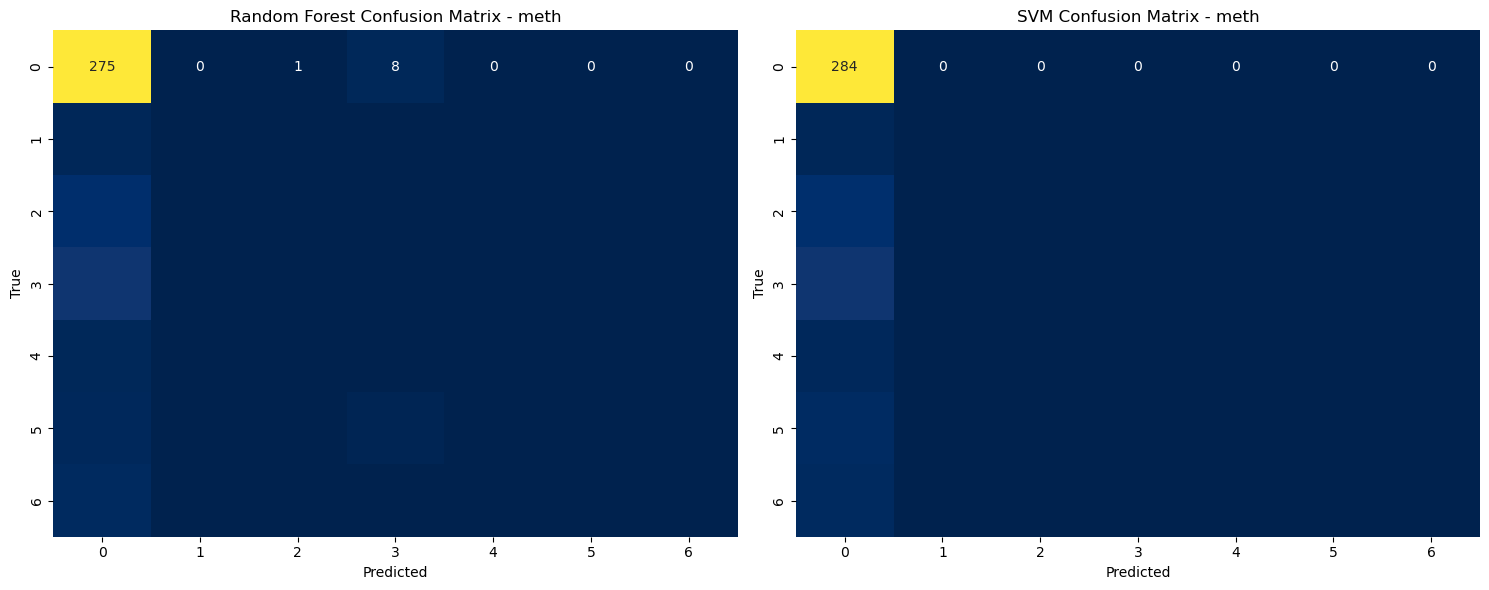

In [240]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

cm_rf = confusion_matrix(y_test_meth, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="cividis", ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix - meth")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

cm_svm = confusion_matrix(y_test_meth, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="cividis", ax=axes[1], cbar=False)
axes[1].set_title("SVM Confusion Matrix - meth")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/meth_plot.png', dpi=300, bbox_inches='tight')

plt.show()


# Preprocessing for the target `mushrooms`

In [241]:
target_column = 27
X = drug_data.iloc[:, :12]
y_mushrooms = drug_data.iloc[:, target_column]

X_train_mushrooms, X_test_mushrooms, y_train_mushrooms, y_test_mushrooms = train_test_split(X, y_mushrooms, test_size=0.2, random_state=42)

scaler_mushrooms = StandardScaler()
X_train_mushrooms = scaler_mushrooms.fit_transform(X_train_mushrooms)
X_test_mushrooms = scaler_mushrooms.transform(X_test_mushrooms)

# Model for the target `mushrooms`

In [242]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_mushrooms, y_train_mushrooms)
rf_predictions = rf_model.predict(X_test_mushrooms)

svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_mushrooms, y_train_mushrooms)
svm_predictions = svm_model.predict(X_test_mushrooms)

rf_accuracy = accuracy_score(y_test_mushrooms, rf_predictions)
svm_accuracy = accuracy_score(y_test_mushrooms, svm_predictions)

In [243]:
print(f"mushrooms - Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"mushrooms - SVM Classifier Accuracy: {svm_accuracy:.4f}")

mushrooms - Random Forest Classifier Accuracy: 0.5119
mushrooms - SVM Classifier Accuracy: 0.5199


In [244]:
# Random Forest Classification Report for mushrooms:")
print(classification_report(y_test_mushrooms, rf_predictions, zero_division=0))


              precision    recall  f1-score   support

         CL0       0.60      0.84      0.70       191
         CL1       0.33      0.12      0.18        42
         CL2       0.24      0.08      0.12        51
         CL3       0.31      0.42      0.36        55
         CL4       0.00      0.00      0.00        30
         CL5       0.00      0.00      0.00         6
         CL6       0.00      0.00      0.00         2

    accuracy                           0.51       377
   macro avg       0.21      0.21      0.19       377
weighted avg       0.42      0.51      0.44       377



In [245]:
# SVM Classification Report for mushrooms:")
print(classification_report(y_test_mushrooms, svm_predictions, zero_division=0))

              precision    recall  f1-score   support

         CL0       0.59      0.86      0.70       191
         CL1       0.25      0.02      0.04        42
         CL2       0.12      0.04      0.06        51
         CL3       0.37      0.53      0.44        55
         CL4       0.00      0.00      0.00        30
         CL5       0.00      0.00      0.00         6
         CL6       0.00      0.00      0.00         2

    accuracy                           0.52       377
   macro avg       0.19      0.21      0.18       377
weighted avg       0.40      0.52      0.43       377



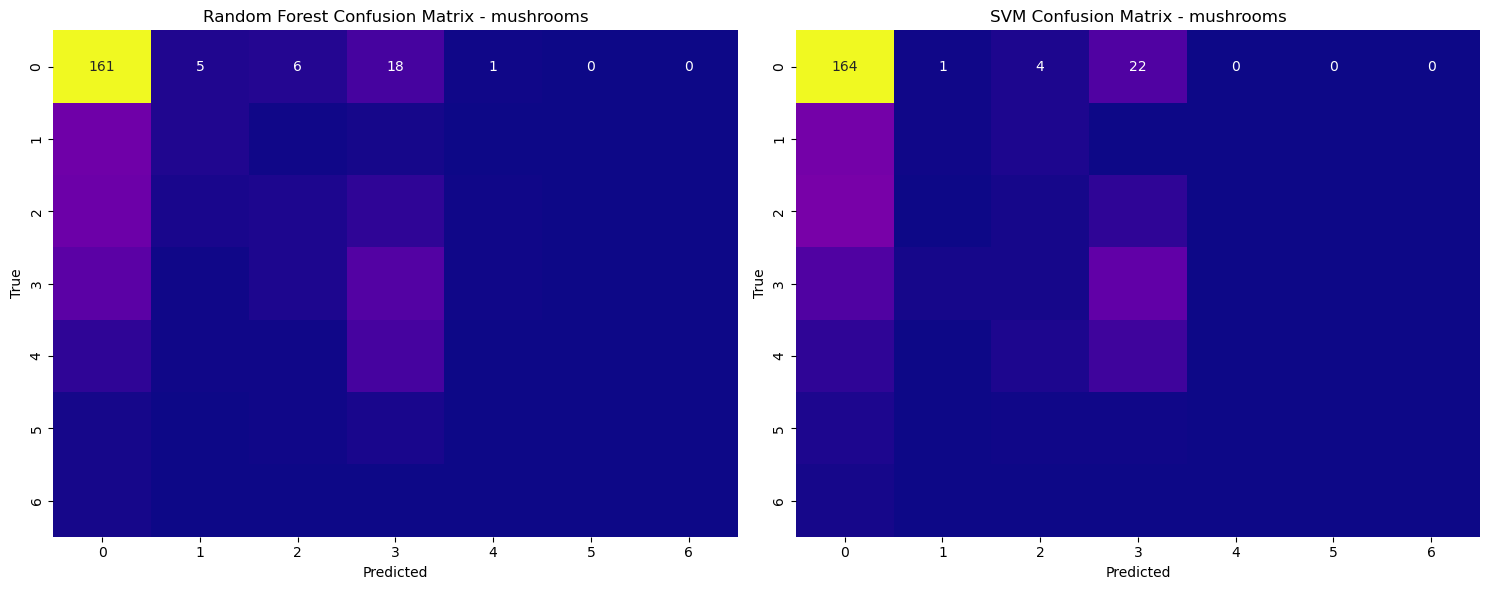

In [246]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

cm_rf = confusion_matrix(y_test_mushrooms, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="plasma", ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix - mushrooms")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

cm_svm = confusion_matrix(y_test_mushrooms, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="plasma", ax=axes[1], cbar=False)
axes[1].set_title("SVM Confusion Matrix - mushrooms")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/mushrooms_plot.png', dpi=300, bbox_inches='tight')

plt.show()


# Preprocessing for the target `nicotine`

In [247]:
target_column = 28
X = drug_data.iloc[:, :12]
y_nicotine = drug_data.iloc[:, target_column]

X_train_nicotine, X_test_nicotine, y_train_nicotine, y_test_nicotine = train_test_split(X, y_nicotine, test_size=0.2, random_state=42)

scaler_nicotine = StandardScaler()
X_train_nicotine = scaler_nicotine.fit_transform(X_train_nicotine)
X_test_nicotine = scaler_nicotine.transform(X_test_nicotine)


# Model for the target `nicotine`

In [248]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_nicotine, y_train_nicotine)
rf_predictions = rf_model.predict(X_test_nicotine)

svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_nicotine, y_train_nicotine)
svm_predictions = svm_model.predict(X_test_nicotine)

In [249]:
rf_accuracy = accuracy_score(y_test_nicotine, rf_predictions)
svm_accuracy = accuracy_score(y_test_nicotine, svm_predictions)

In [250]:
print(f"nicotine - Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"nicotine - SVM Classifier Accuracy: {svm_accuracy:.4f}")

nicotine - Random Forest Classifier Accuracy: 0.3740
nicotine - SVM Classifier Accuracy: 0.3873


In [251]:
print("\nRandom Forest Classification Report for nicotine:")
print(classification_report(y_test_nicotine, rf_predictions, zero_division=0))


Random Forest Classification Report for nicotine:
              precision    recall  f1-score   support

         CL0       0.38      0.51      0.43        91
         CL1       0.25      0.18      0.21        34
         CL2       0.27      0.07      0.11        44
         CL3       0.25      0.09      0.13        33
         CL4       0.00      0.00      0.00        19
         CL5       0.00      0.00      0.00        34
         CL6       0.41      0.68      0.51       122

    accuracy                           0.37       377
   macro avg       0.22      0.22      0.20       377
weighted avg       0.30      0.37      0.31       377



In [252]:
print("\nSVM Classification Report for nicotine:")
print(classification_report(y_test_nicotine, svm_predictions, zero_division=0))


SVM Classification Report for nicotine:
              precision    recall  f1-score   support

         CL0       0.37      0.51      0.43        91
         CL1       0.38      0.09      0.14        34
         CL2       0.00      0.00      0.00        44
         CL3       0.00      0.00      0.00        33
         CL4       0.00      0.00      0.00        19
         CL5       0.00      0.00      0.00        34
         CL6       0.40      0.80      0.53       122

    accuracy                           0.39       377
   macro avg       0.16      0.20      0.16       377
weighted avg       0.25      0.39      0.29       377



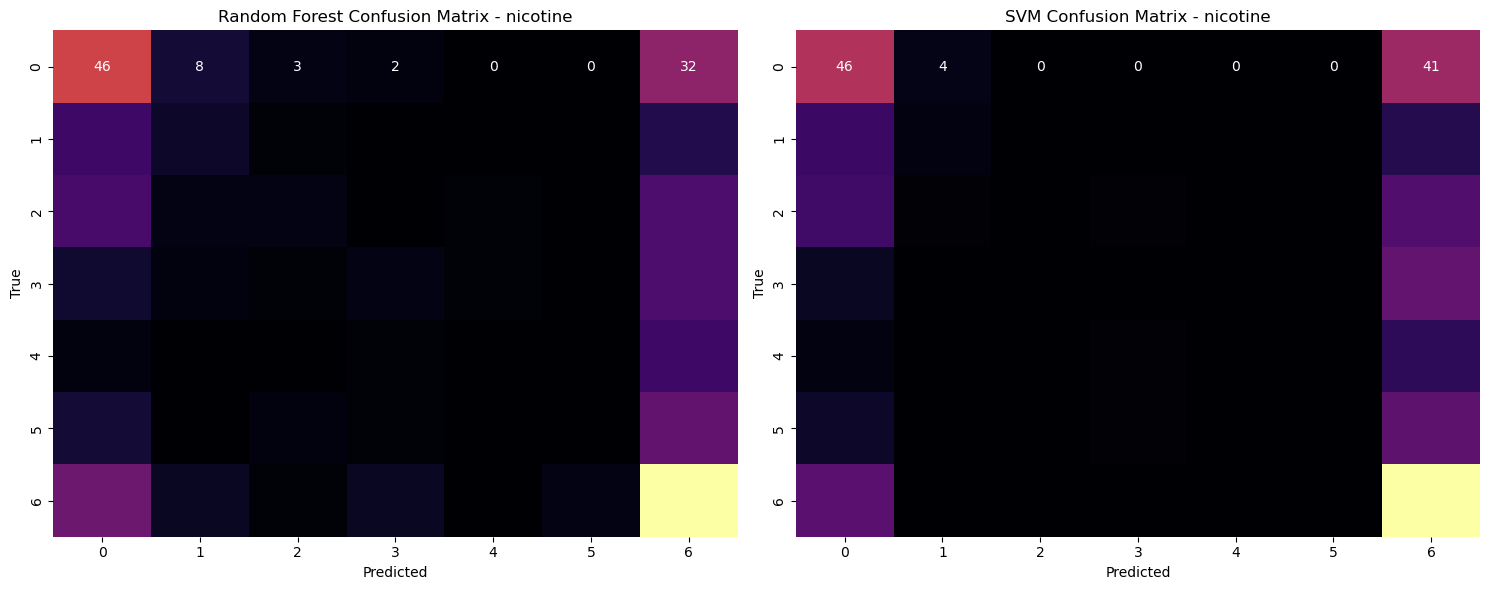

In [253]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

cm_rf = confusion_matrix(y_test_nicotine, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="inferno", ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix - nicotine")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

cm_svm = confusion_matrix(y_test_nicotine, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="inferno", ax=axes[1], cbar=False)
axes[1].set_title("SVM Confusion Matrix - nicotine")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/nicotine_plot.png', dpi=300, bbox_inches='tight')

plt.show()


# Preprocessing for the target `semer`

In [254]:
target_column = 29
X = drug_data.iloc[:, :12]
y_semer = drug_data.iloc[:, target_column]

X_train_semer, X_test_semer, y_train_semer, y_test_semer = train_test_split(X, y_semer, test_size=0.2, random_state=42)

scaler_semer = StandardScaler()
X_train_semer = scaler_semer.fit_transform(X_train_semer)
X_test_semer = scaler_semer.transform(X_test_semer)


# Model for the target `semer`

In [255]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_semer, y_train_semer)
rf_predictions = rf_model.predict(X_test_semer)

svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_semer, y_train_semer)
svm_predictions = svm_model.predict(X_test_semer)


In [256]:
rf_accuracy = accuracy_score(y_test_semer, rf_predictions)
svm_accuracy = accuracy_score(y_test_semer, svm_predictions)

In [257]:
print(f"semer - Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"semer - SVM Classifier Accuracy: {svm_accuracy:.4f}")

semer - Random Forest Classifier Accuracy: 0.9973
semer - SVM Classifier Accuracy: 0.9973


In [258]:
print("\nRandom Forest Classification Report for semer:")
print(classification_report(y_test_semer, rf_predictions, zero_division=0))


Random Forest Classification Report for semer:
              precision    recall  f1-score   support

         CL0       1.00      1.00      1.00       376
         CL2       0.00      0.00      0.00         1

    accuracy                           1.00       377
   macro avg       0.50      0.50      0.50       377
weighted avg       0.99      1.00      1.00       377



In [259]:
print("\nSVM Classification Report for semer:")
print(classification_report(y_test_semer, svm_predictions, zero_division=0))


SVM Classification Report for semer:
              precision    recall  f1-score   support

         CL0       1.00      1.00      1.00       376
         CL2       0.00      0.00      0.00         1

    accuracy                           1.00       377
   macro avg       0.50      0.50      0.50       377
weighted avg       0.99      1.00      1.00       377



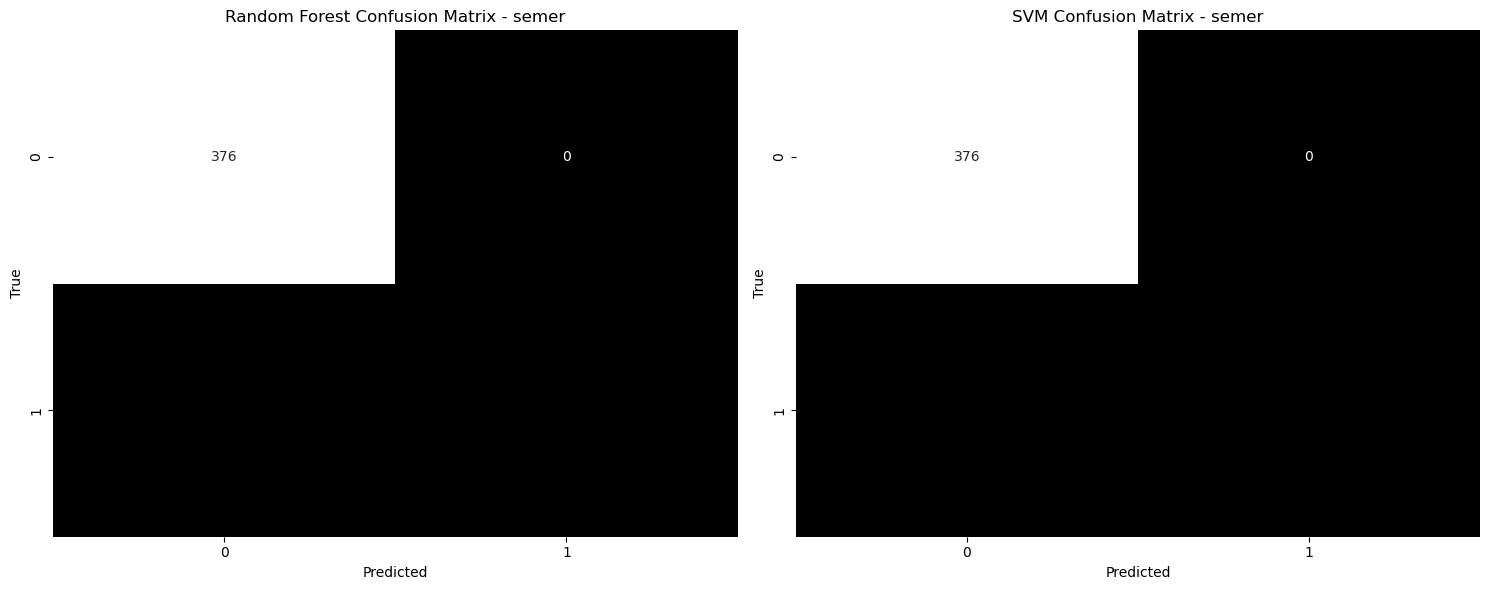

In [260]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

cm_rf = confusion_matrix(y_test_semer, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="cubehelix", ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix - semer")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

cm_svm = confusion_matrix(y_test_semer, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="cubehelix", ax=axes[1], cbar=False)
axes[1].set_title("SVM Confusion Matrix - semer")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/semer_plot.png', dpi=300, bbox_inches='tight')

plt.show()


# Preprocessing for the target `vsa`

In [261]:
target_column = 30
X = drug_data.iloc[:, :12]
y_vsa = drug_data.iloc[:, target_column]

X_train_vsa, X_test_vsa, y_train_vsa, y_test_vsa = train_test_split(X, y_vsa, test_size=0.2, random_state=42)

scaler_vsa = StandardScaler()
X_train_vsa = scaler_vsa.fit_transform(X_train_vsa)
X_test_vsa = scaler_vsa.transform(X_test_vsa)

# Model for the target `vsa`

In [262]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_vsa, y_train_vsa)
rf_predictions = rf_model.predict(X_test_vsa)

svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_vsa, y_train_vsa)
svm_predictions = svm_model.predict(X_test_vsa)

In [263]:
rf_accuracy = accuracy_score(y_test_vsa, rf_predictions)
svm_accuracy = accuracy_score(y_test_vsa, svm_predictions)

In [264]:
print(f"vsa - Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"vsa - SVM Classifier Accuracy: {svm_accuracy:.4f}")

vsa - Random Forest Classifier Accuracy: 0.7639
vsa - SVM Classifier Accuracy: 0.7666


In [265]:

print("\nRandom Forest Classification Report for vsa:")
print(classification_report(y_test_vsa, rf_predictions, zero_division=0))


Random Forest Classification Report for vsa:
              precision    recall  f1-score   support

         CL0       0.77      1.00      0.87       289
         CL1       0.00      0.00      0.00        39
         CL2       0.00      0.00      0.00        27
         CL3       0.00      0.00      0.00        12
         CL4       0.00      0.00      0.00         1
         CL5       0.00      0.00      0.00         8
         CL6       0.00      0.00      0.00         1

    accuracy                           0.76       377
   macro avg       0.11      0.14      0.12       377
weighted avg       0.59      0.76      0.66       377



In [266]:
print("\nSVM Classification Report for vsa:")
print(classification_report(y_test_vsa, svm_predictions, zero_division=0))



SVM Classification Report for vsa:
              precision    recall  f1-score   support

         CL0       0.77      1.00      0.87       289
         CL1       0.00      0.00      0.00        39
         CL2       0.00      0.00      0.00        27
         CL3       0.00      0.00      0.00        12
         CL4       0.00      0.00      0.00         1
         CL5       0.00      0.00      0.00         8
         CL6       0.00      0.00      0.00         1

    accuracy                           0.77       377
   macro avg       0.11      0.14      0.12       377
weighted avg       0.59      0.77      0.67       377



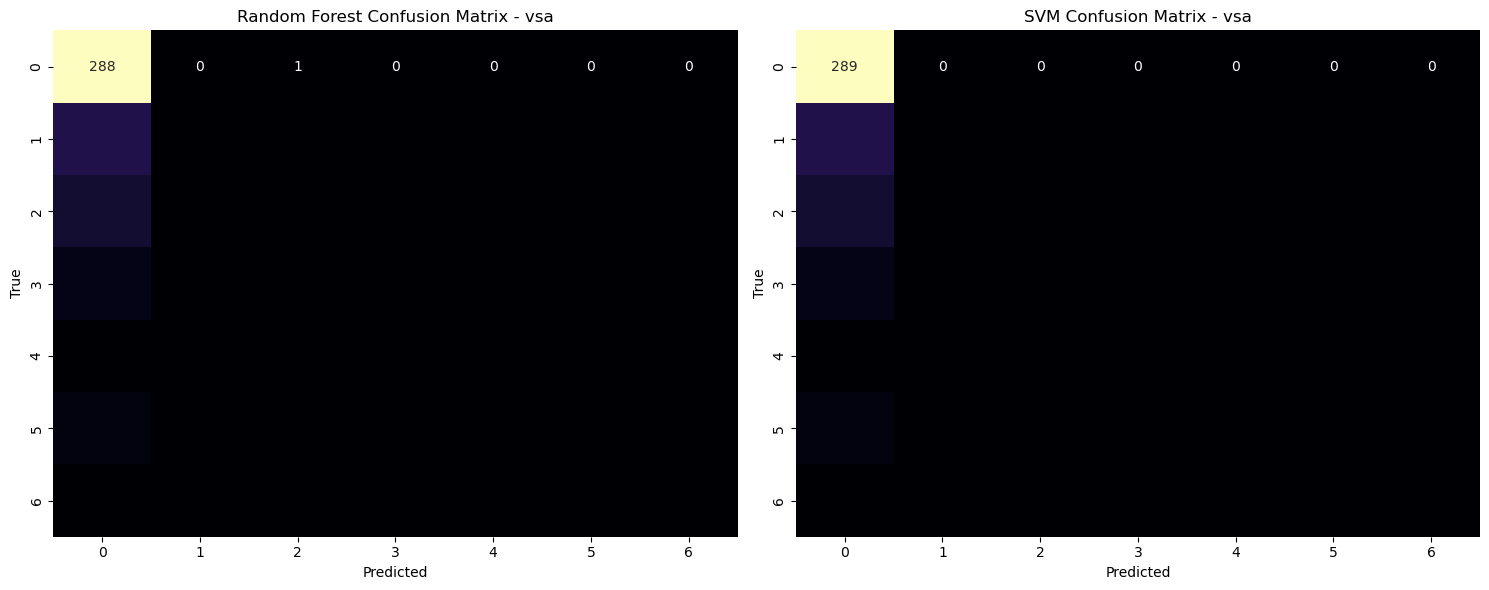

In [270]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

cm_rf = confusion_matrix(y_test_vsa, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="magma", ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix - vsa")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

cm_svm = confusion_matrix(y_test_vsa, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="magma", ax=axes[1], cbar=False)
axes[1].set_title("SVM Confusion Matrix - vsa")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/vsa_plot.png', dpi=300, bbox_inches='tight')

plt.show()